# Events impact on scores
# Setup

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from pickle5 import pickle

In [6]:
# Import data

# For Mac users :
#df = pd.read_pickle(os.path.join(PKL_PATH, "final_subset_flaired.pkl"))

### For windows users :
df = pickle.load(open("data/pkl/final_subset_flaired.pkl", "rb"))

DATA_PATH = "data"
events = pd.read_csv("data/events/events.csv").iloc[:,1:4]

In [8]:
# Transform data type for further use
for i in range(len(df)):
    df['date'].iloc[i] = datetime.datetime.strptime(df['date'].iloc[i], "%Y-%m-%d %H:%M:%S")
    
for i in range(len(events)):
    events['date'][i] = datetime.datetime.strptime(events['date'][i], "%Y-%m-%d")

C:\Users\rened\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
# Create subdata for each party
party_grps = df.groupby('parties')
df_rep = df[df["parties"] == "Republican"]
df_dem = df[df["parties"] == "Democrat"]

# Sentiment score distribution around key events

### 2 weeks prior and after event

C:\Users\rened\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


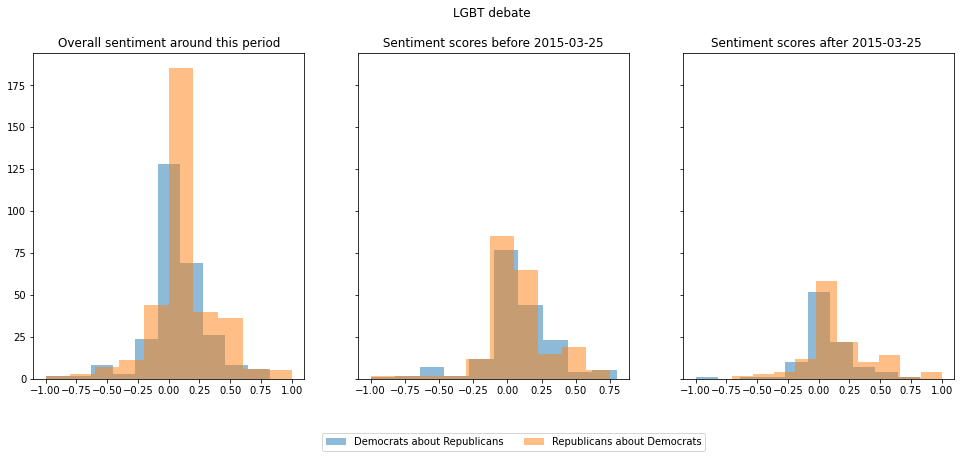

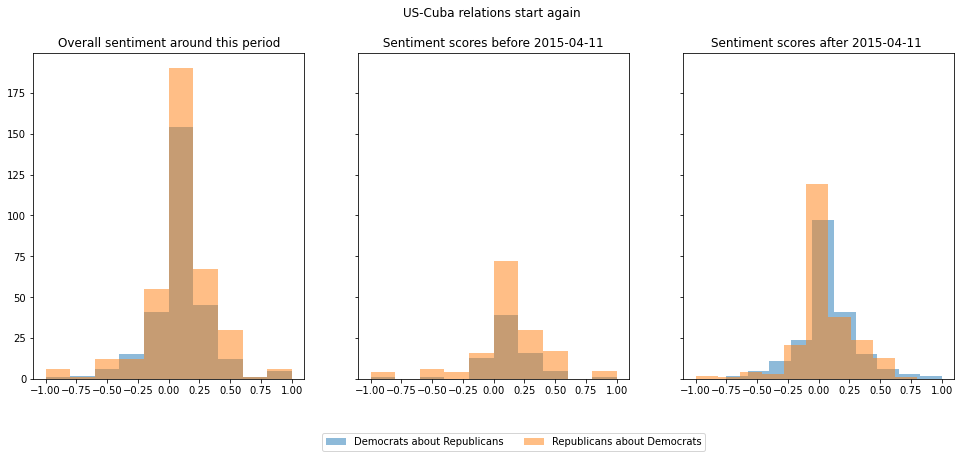

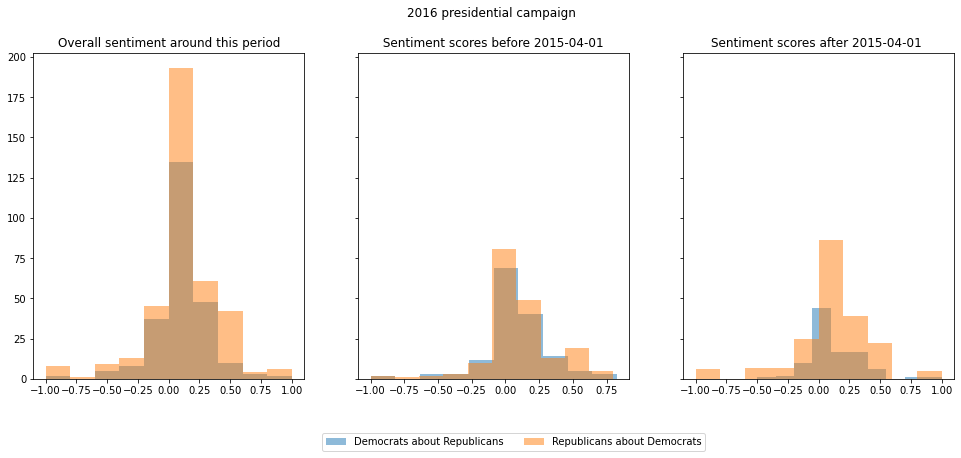

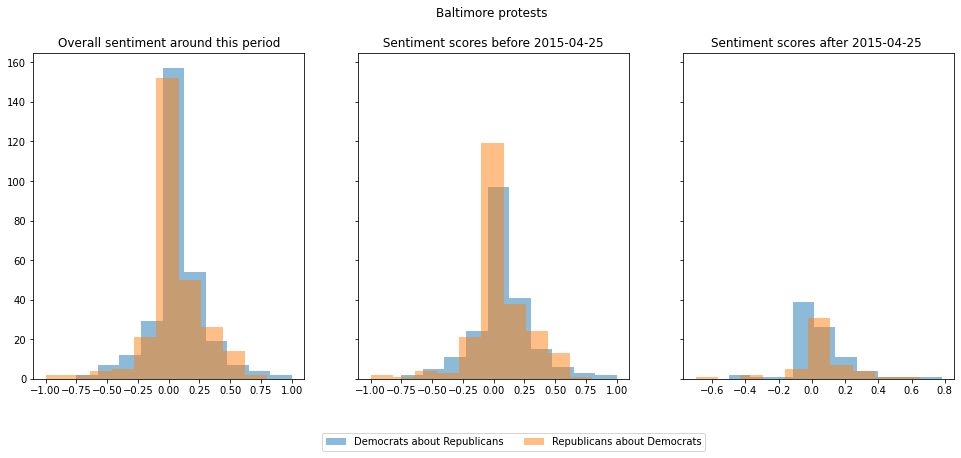

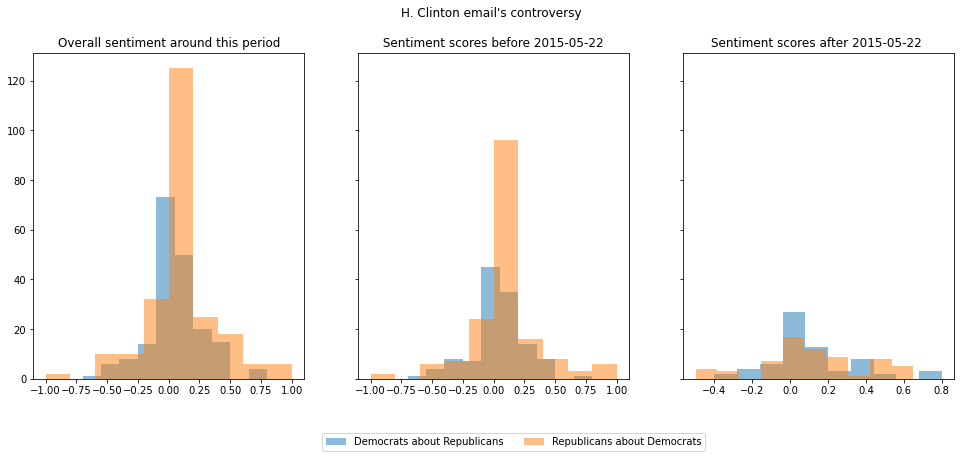

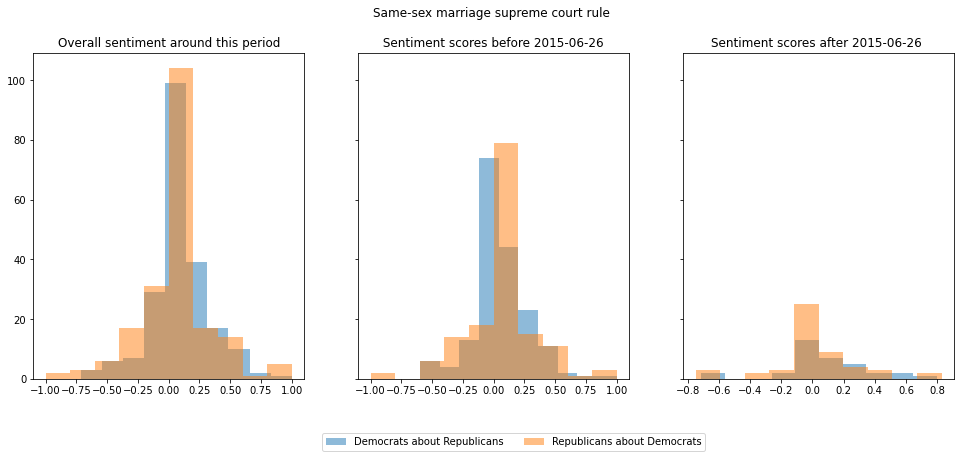

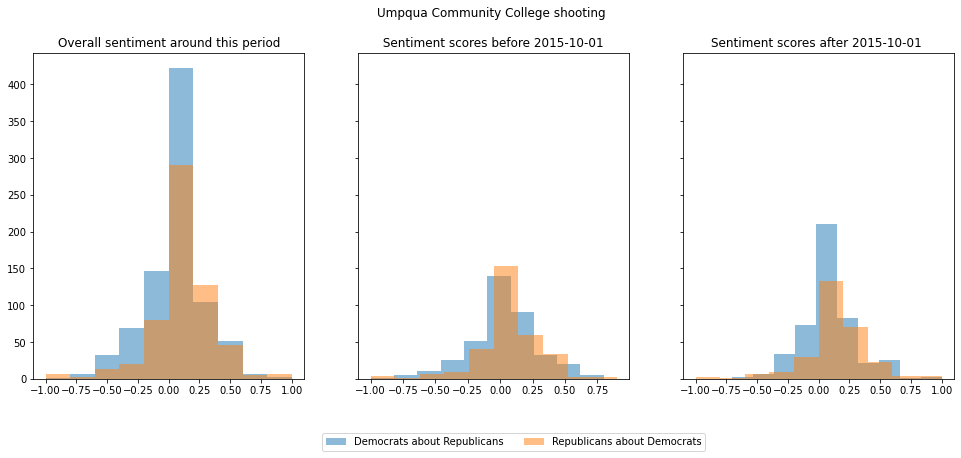

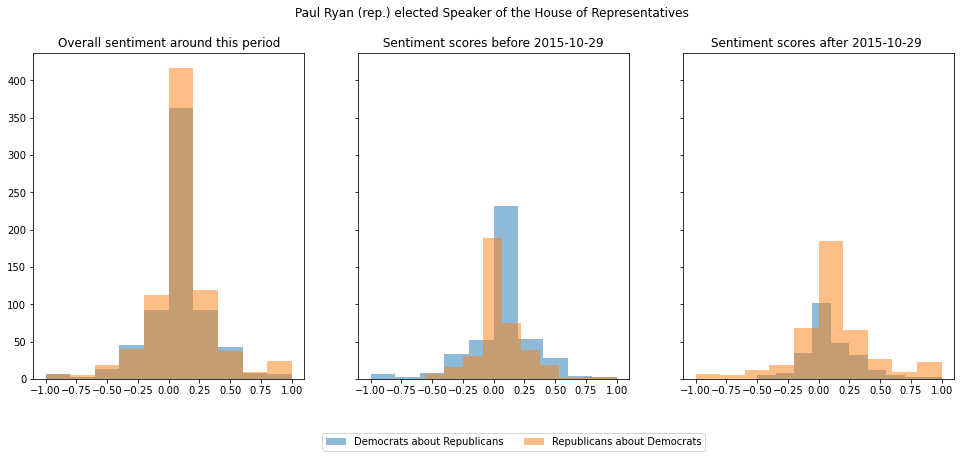

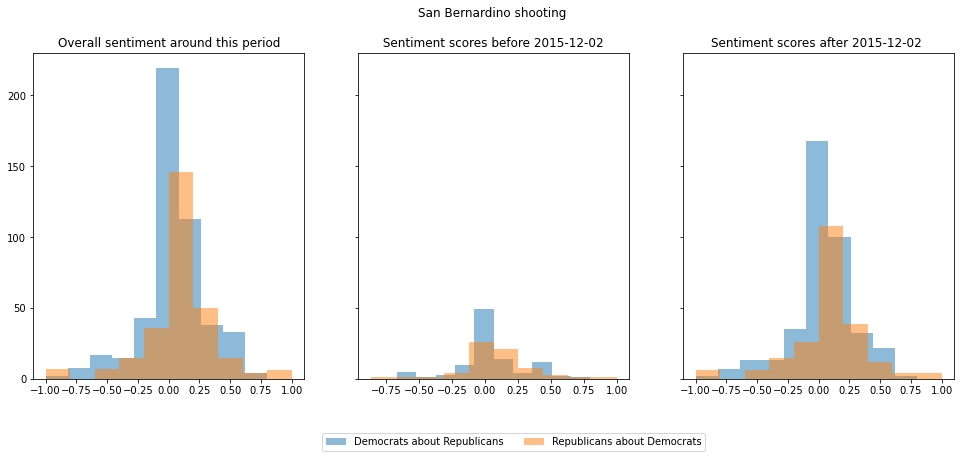

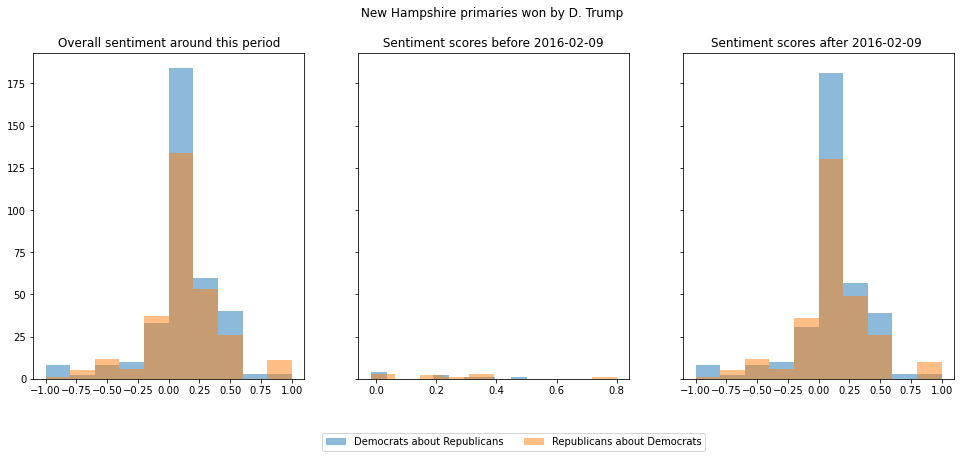

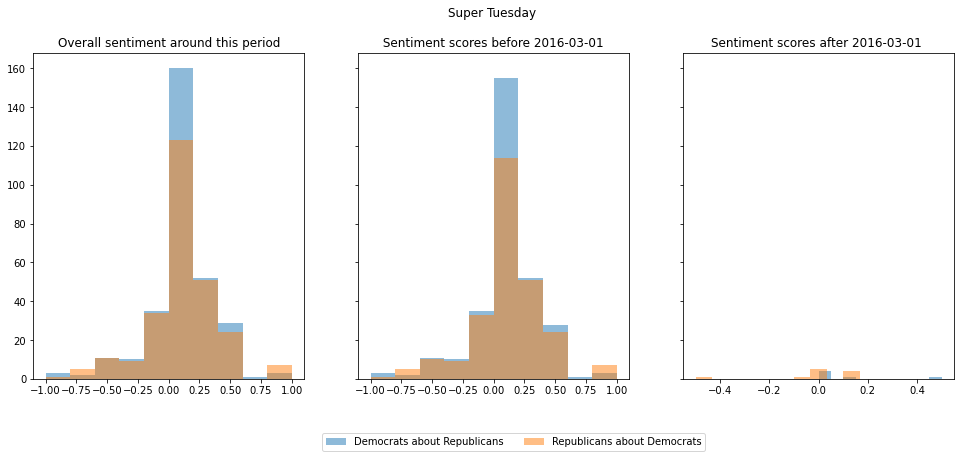

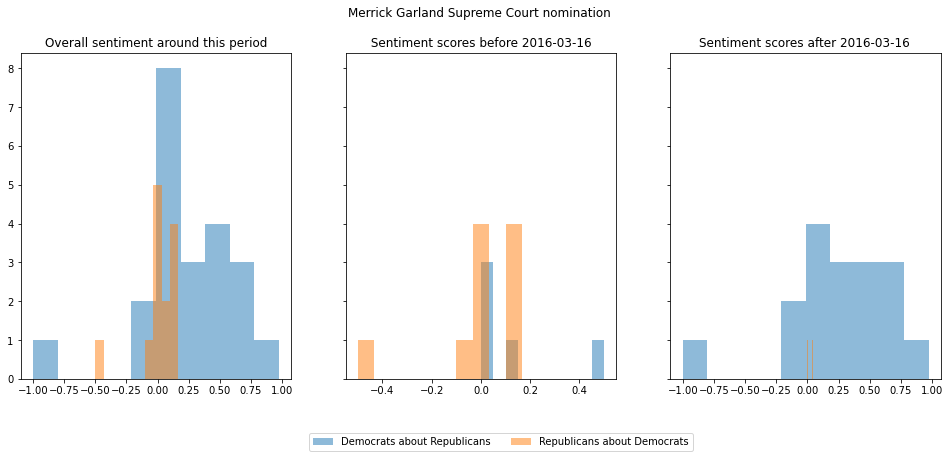

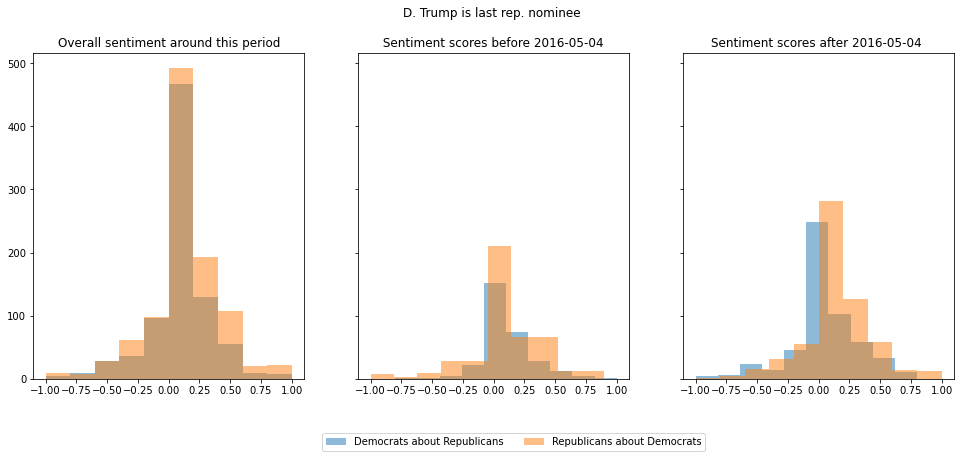

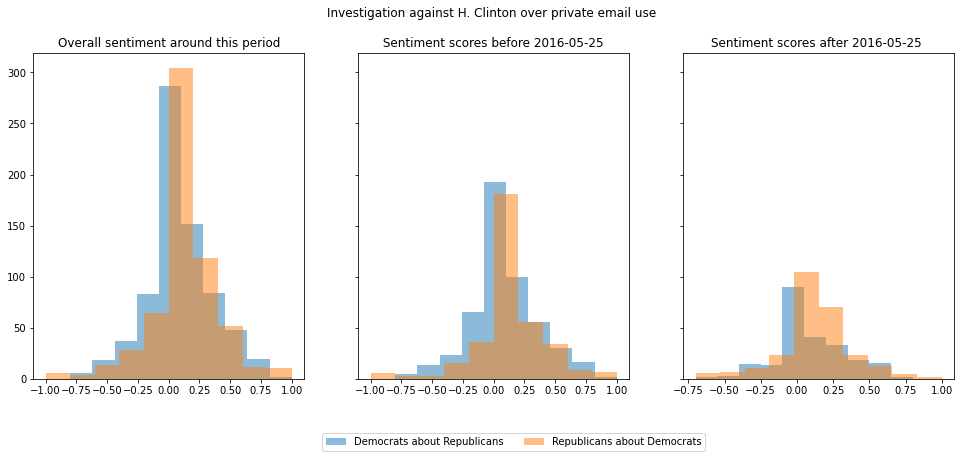

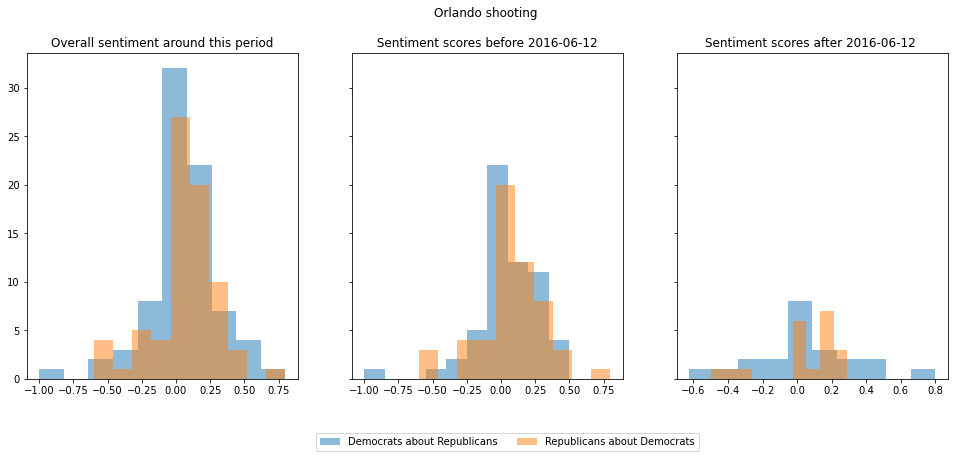

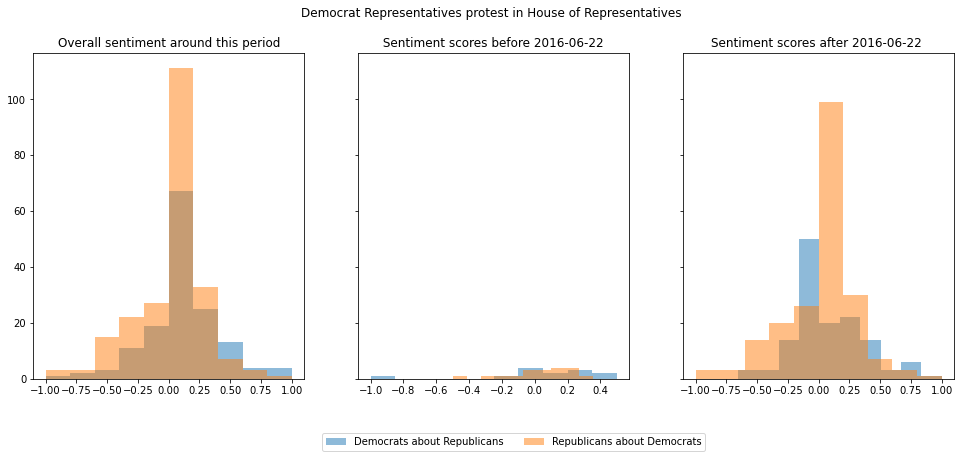

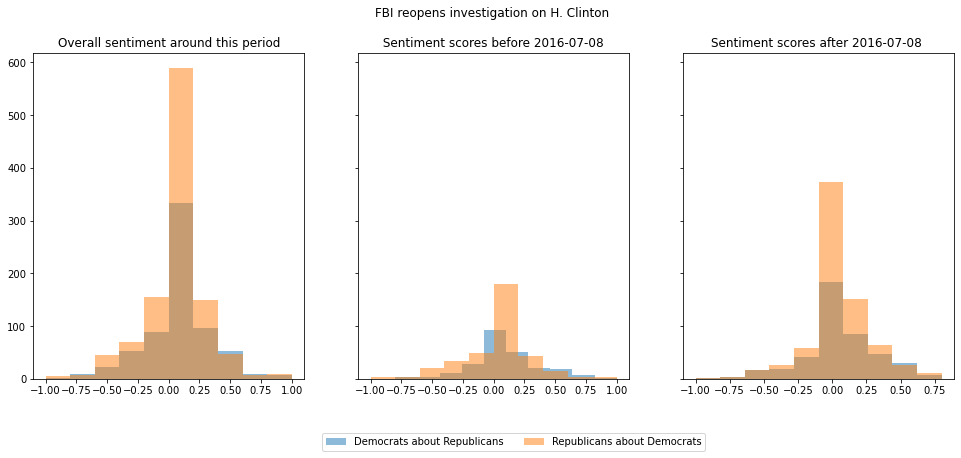

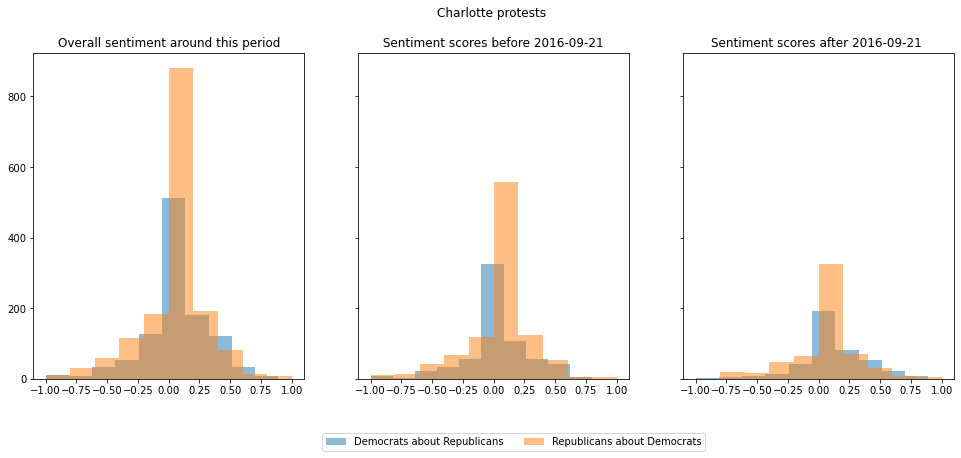

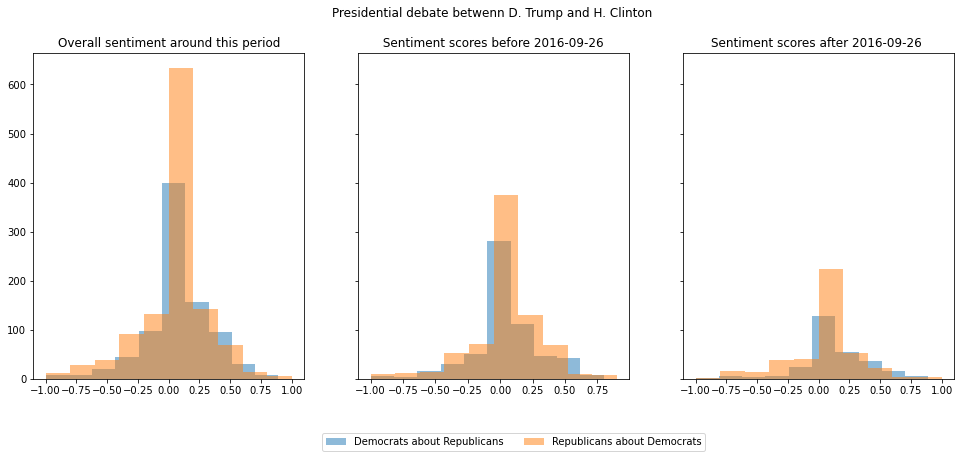

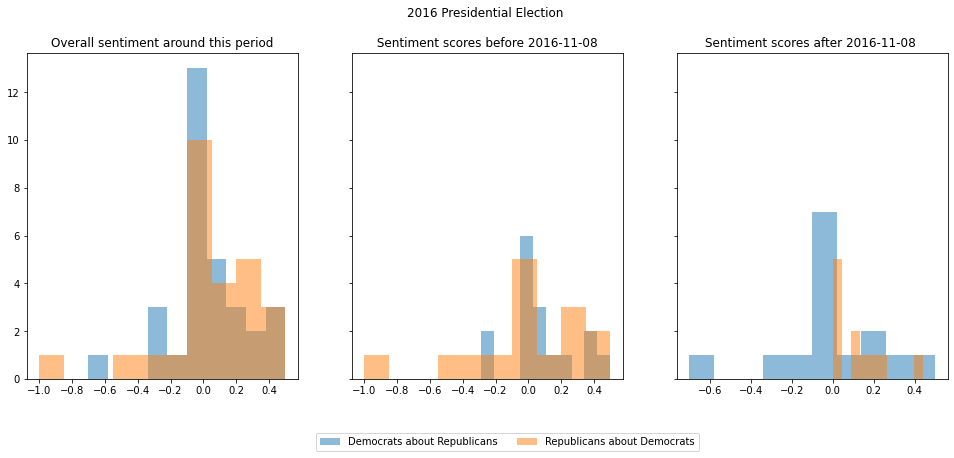

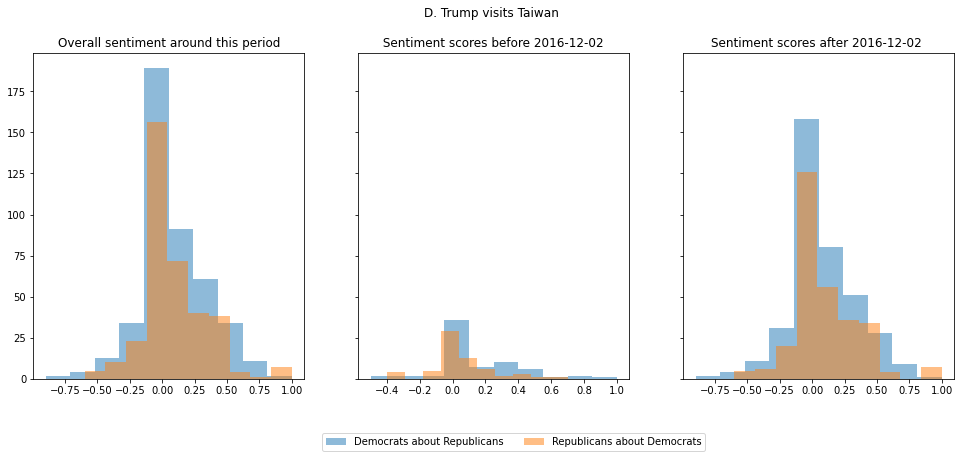

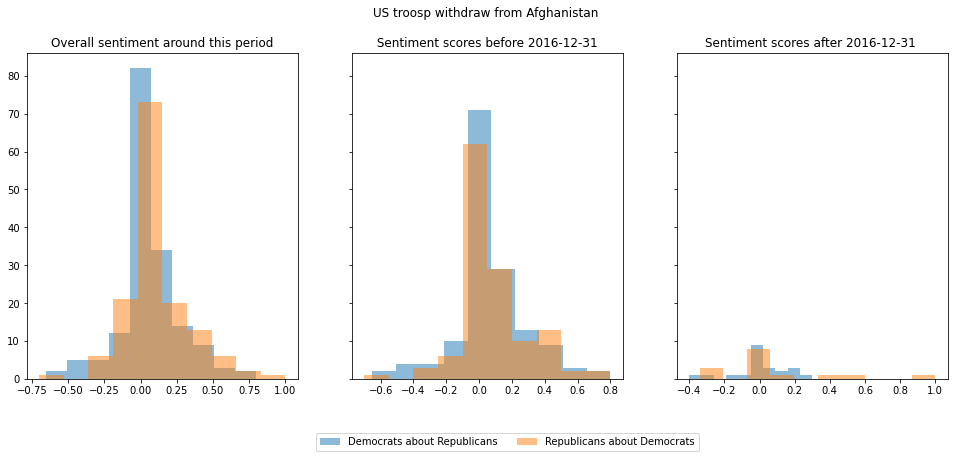

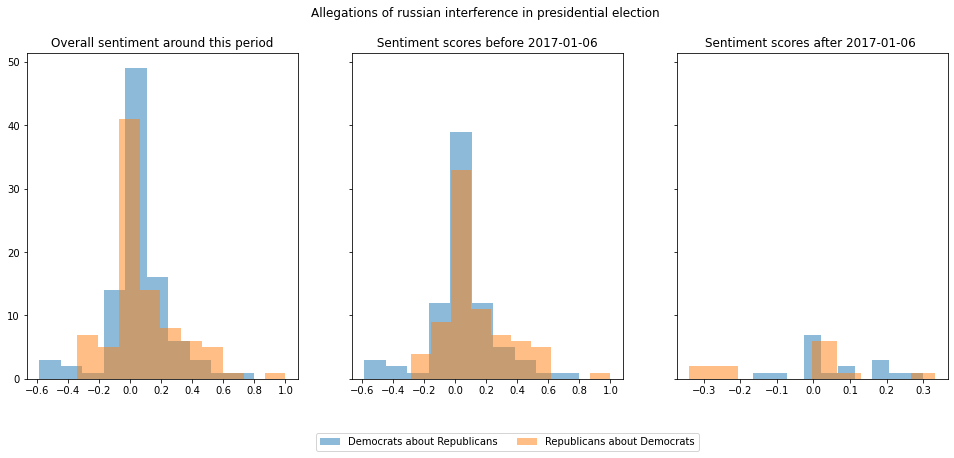

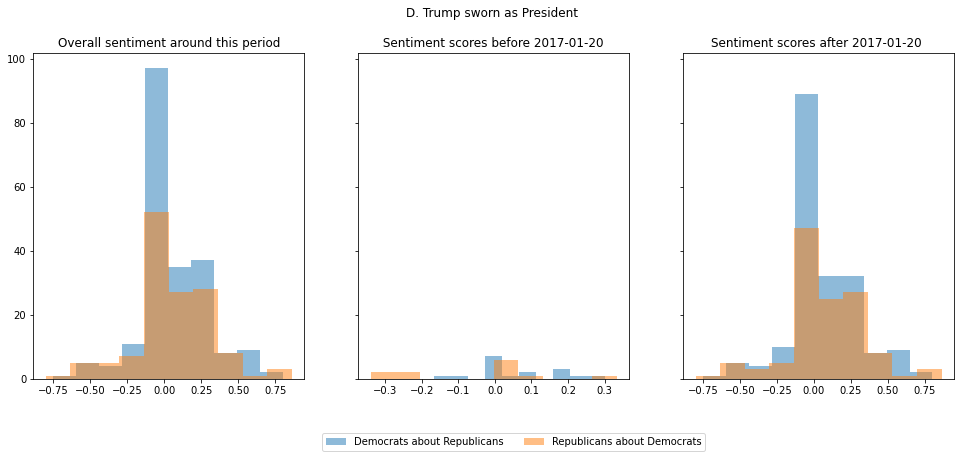

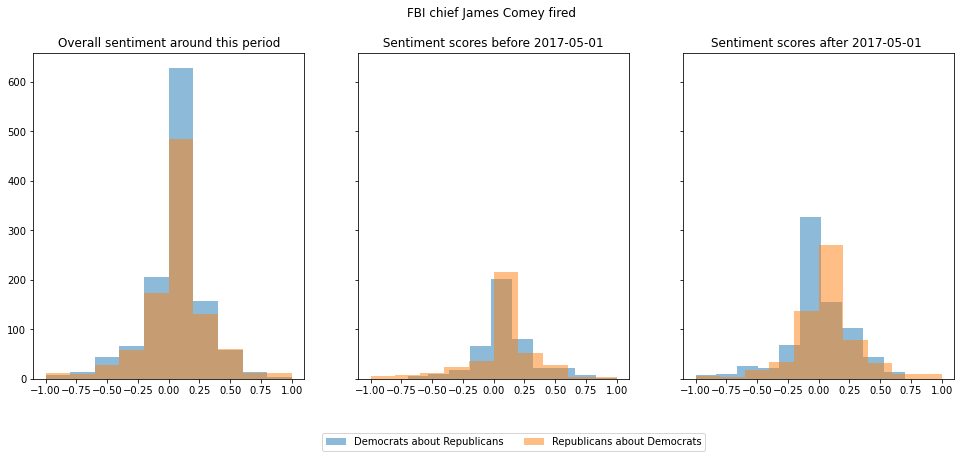

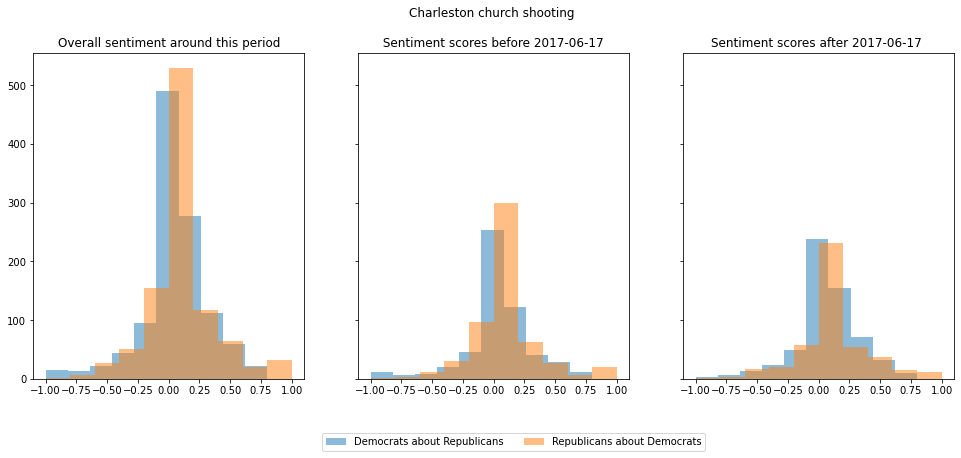

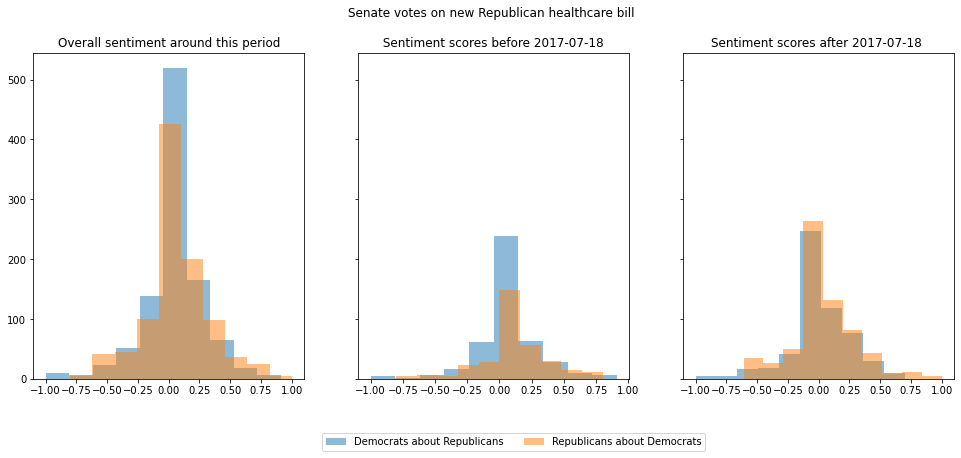

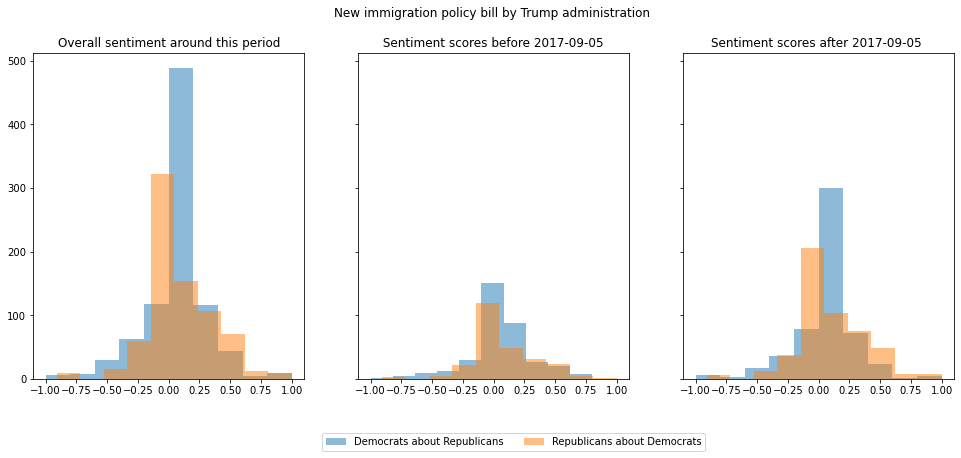

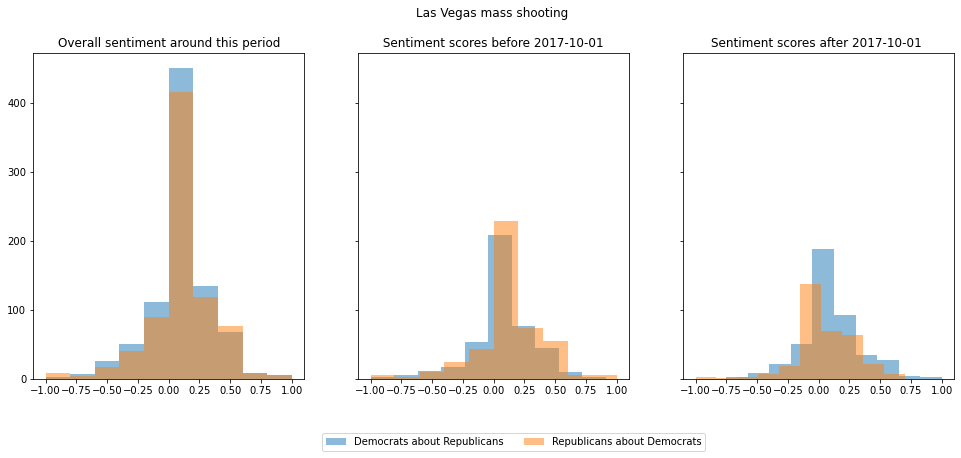

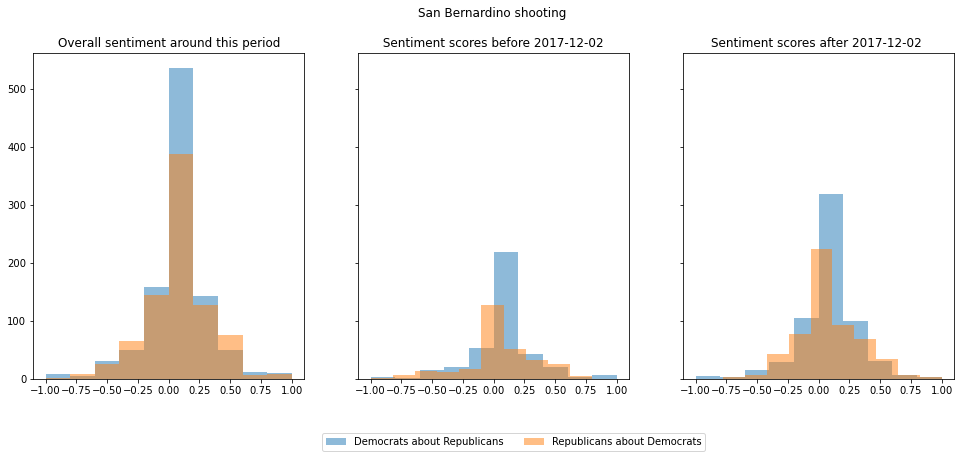

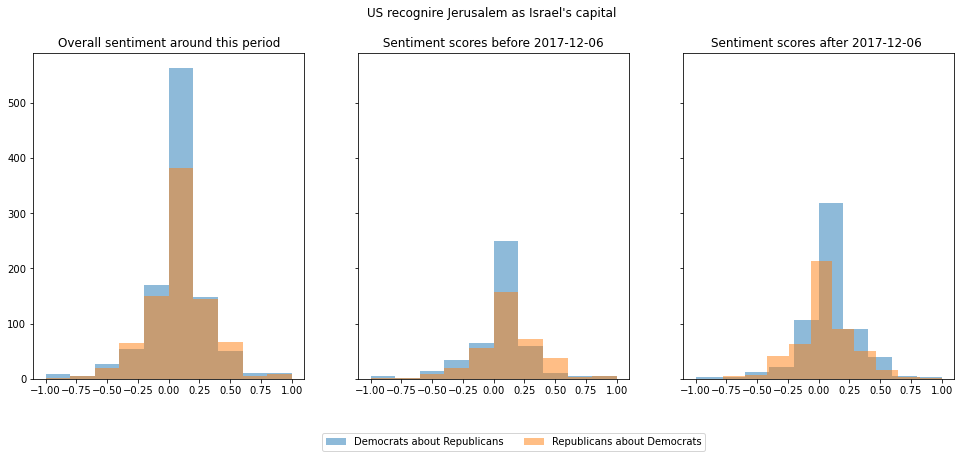

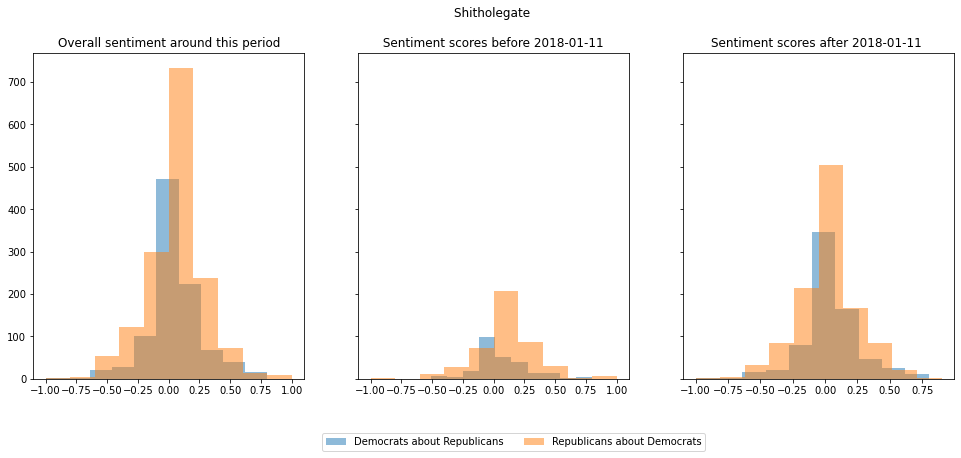

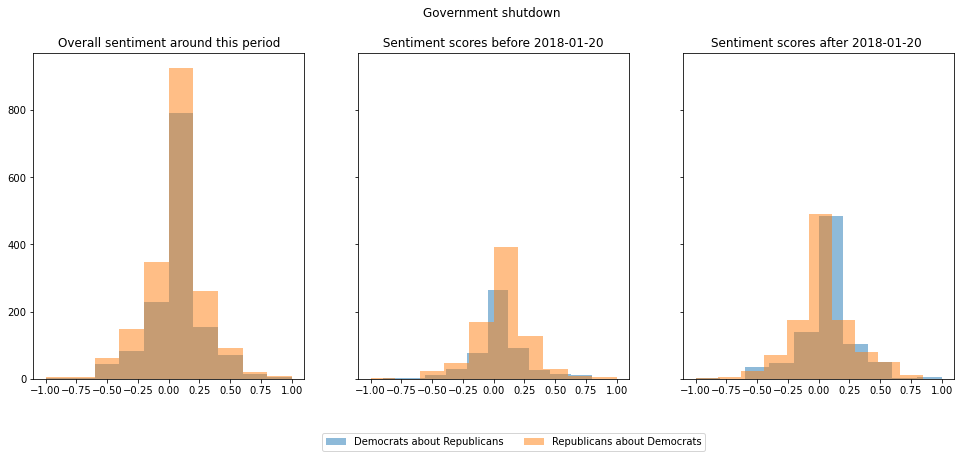

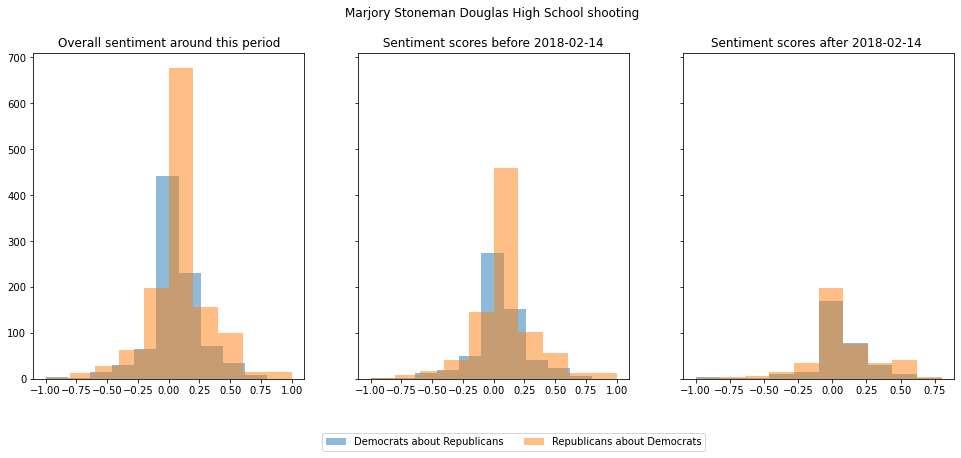

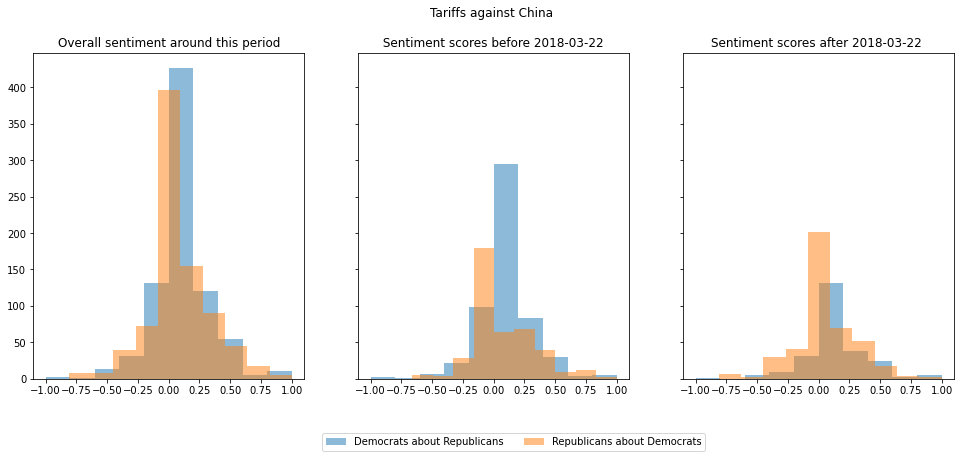

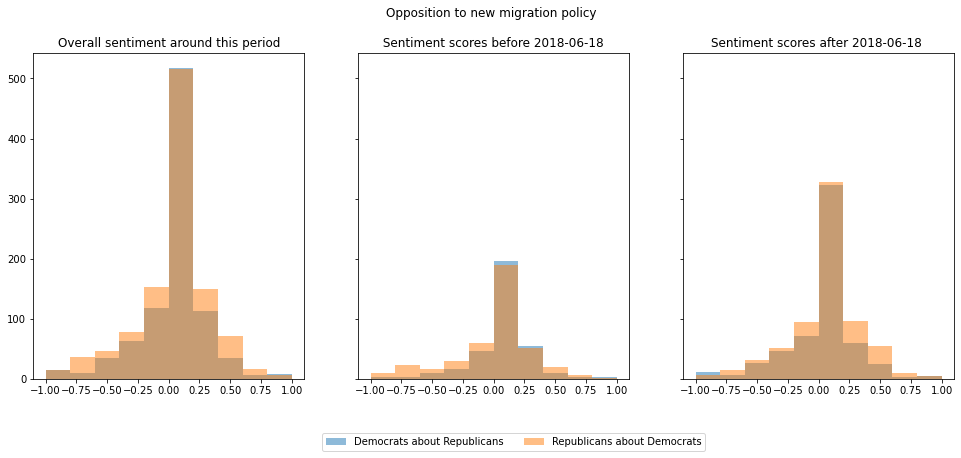

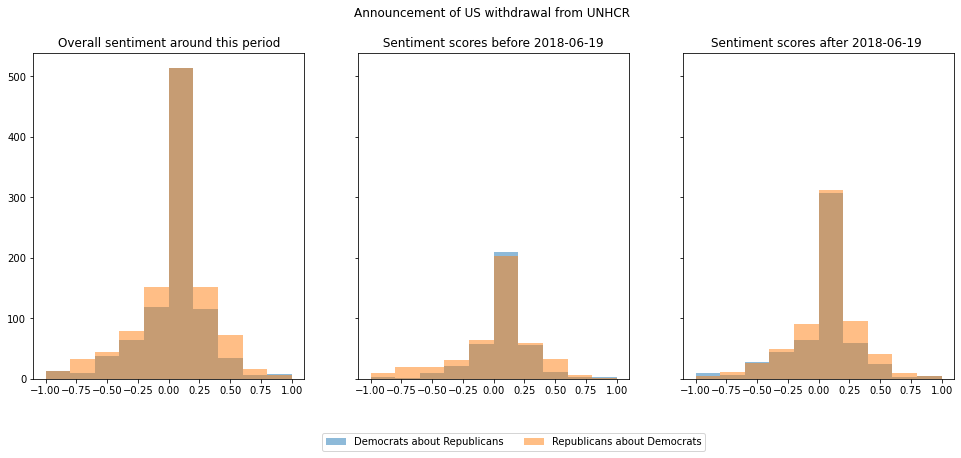

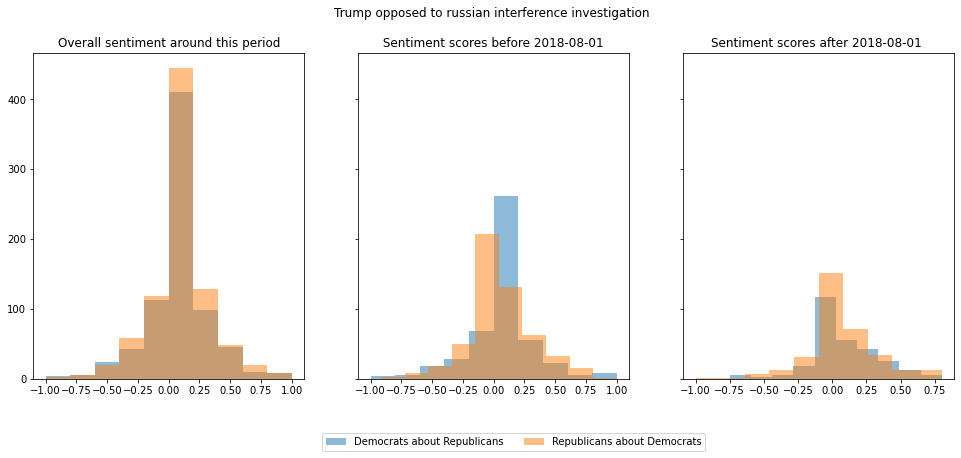

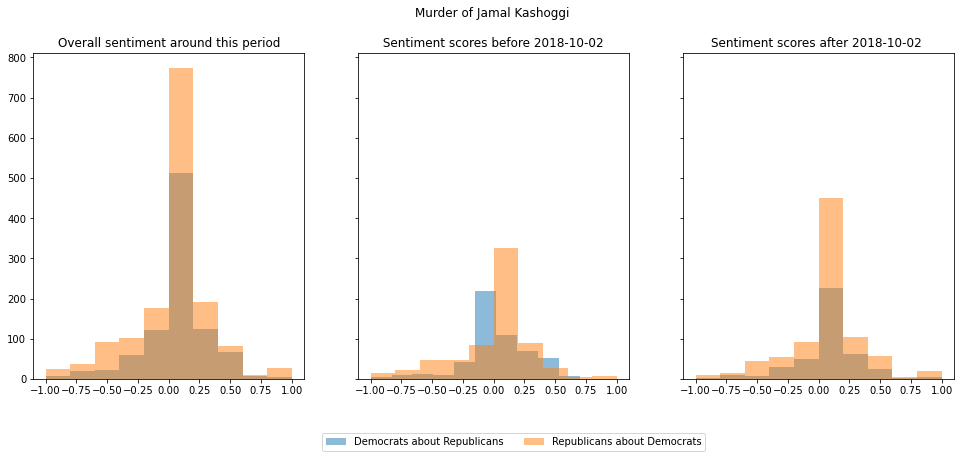

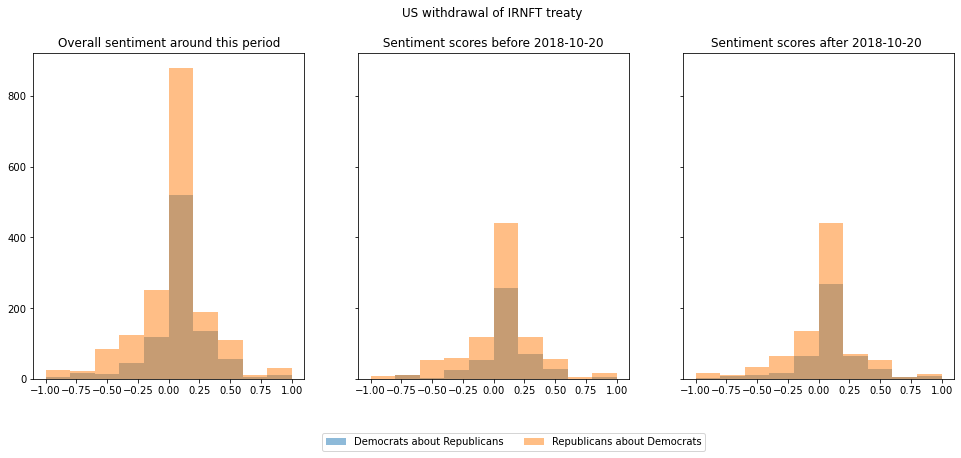

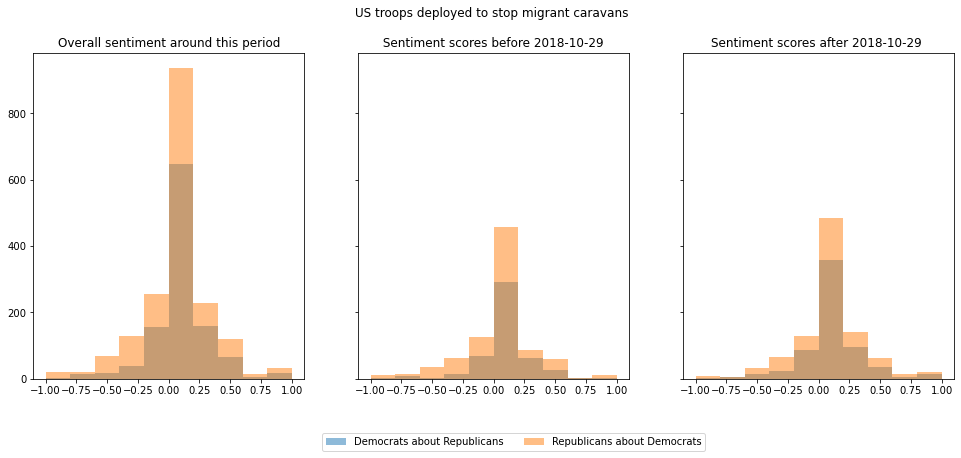

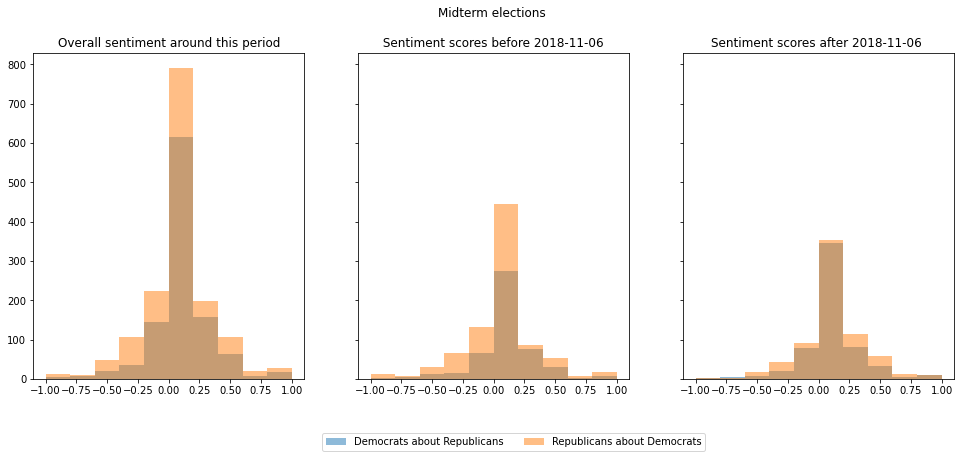

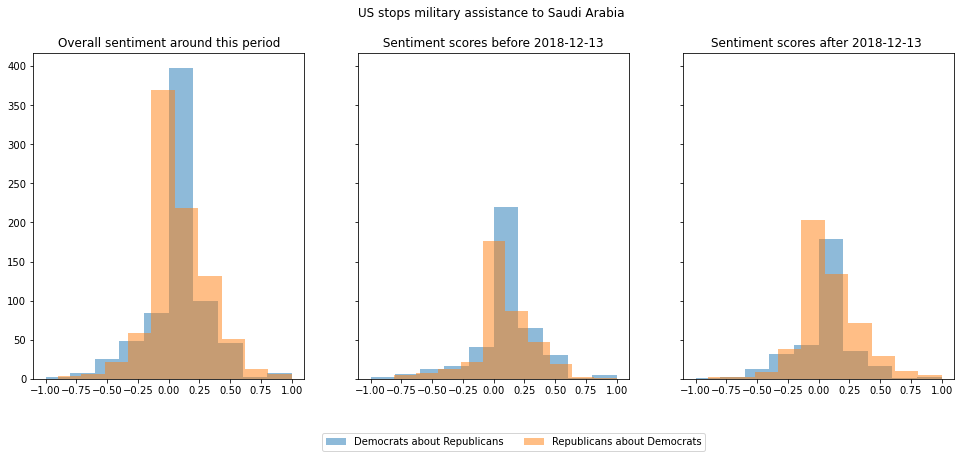

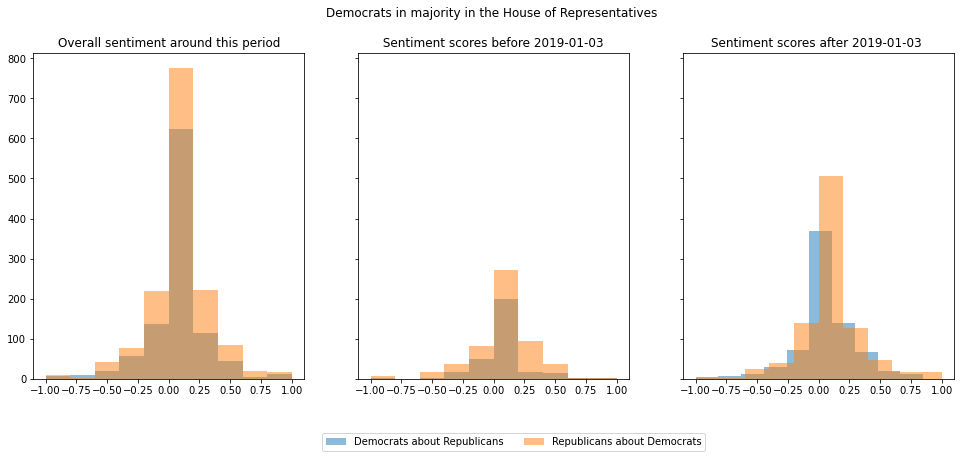

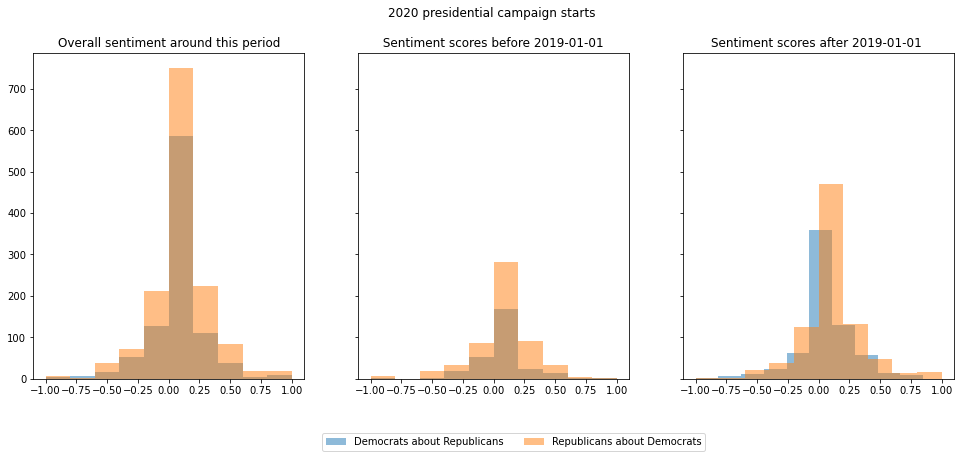

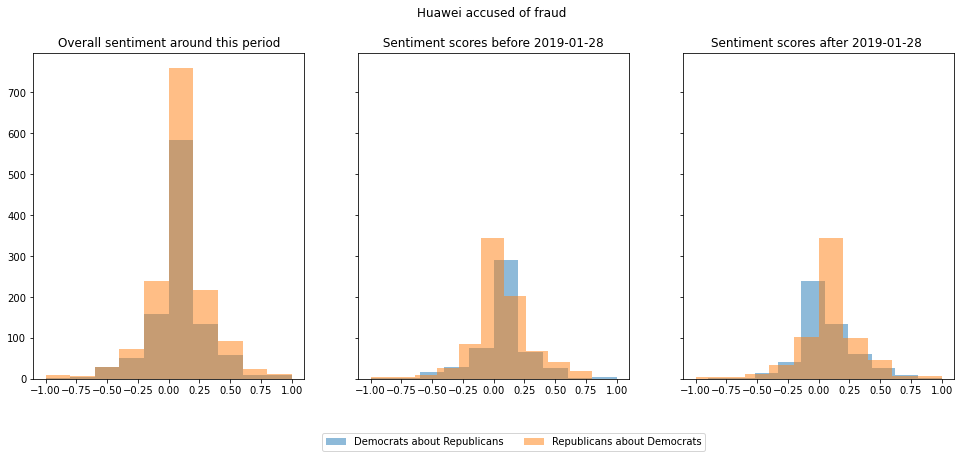

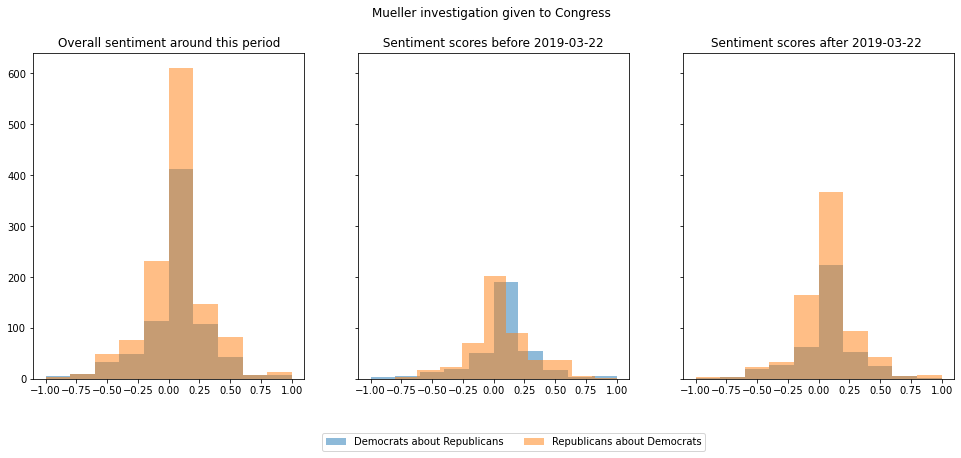

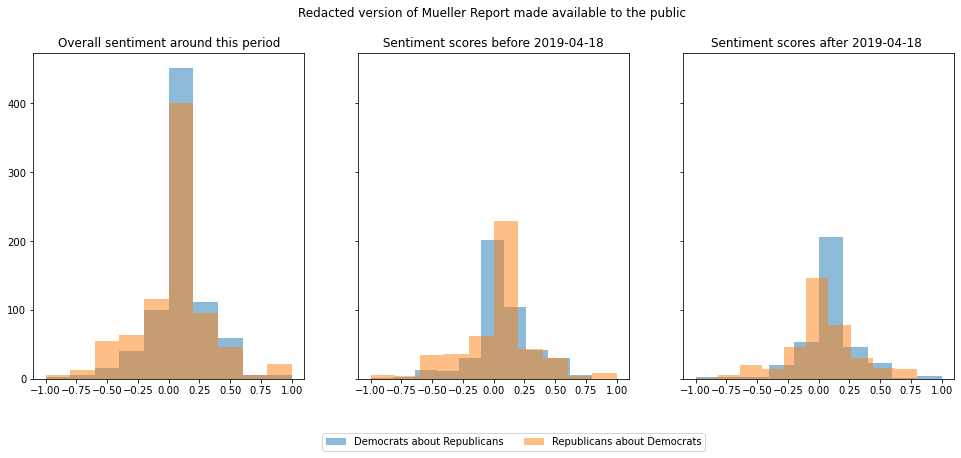

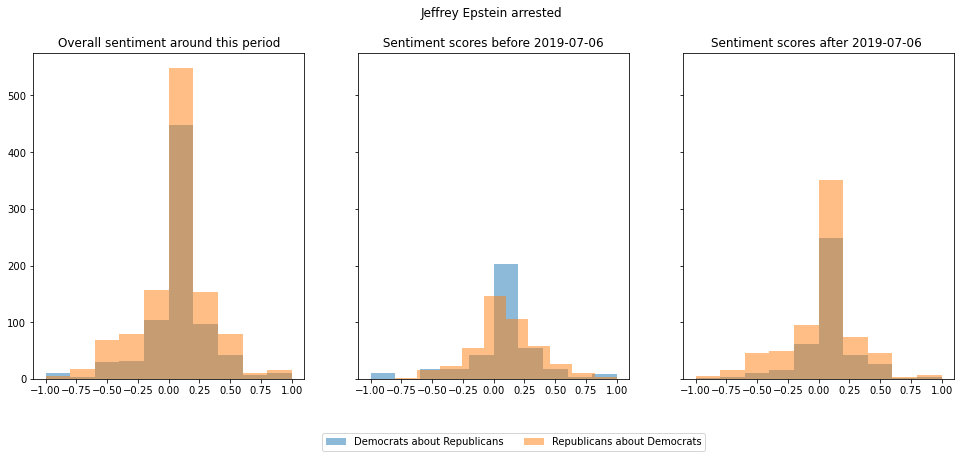

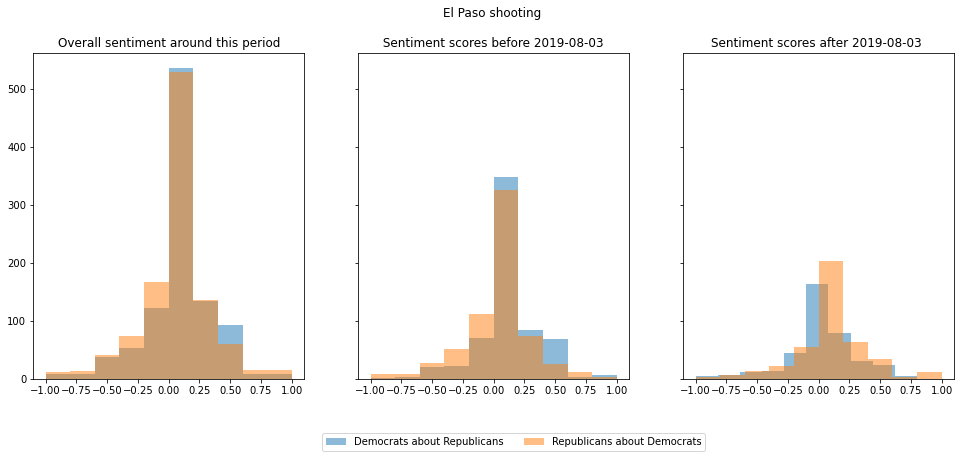

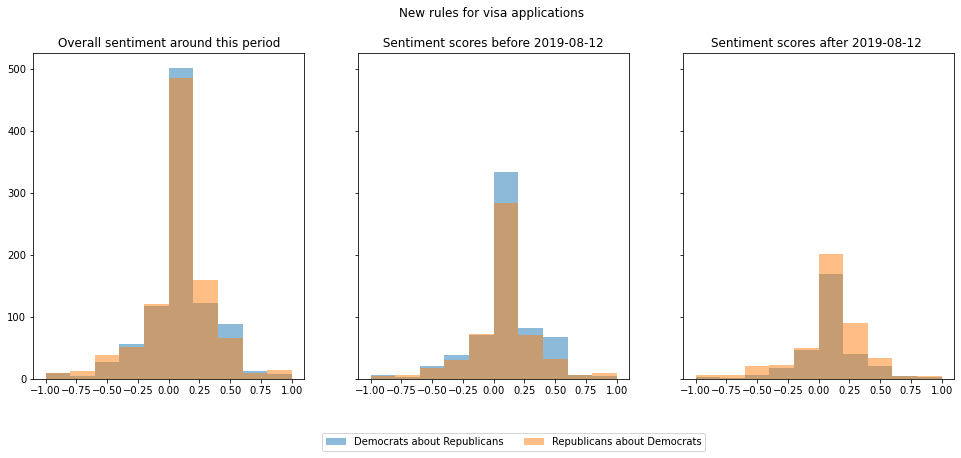

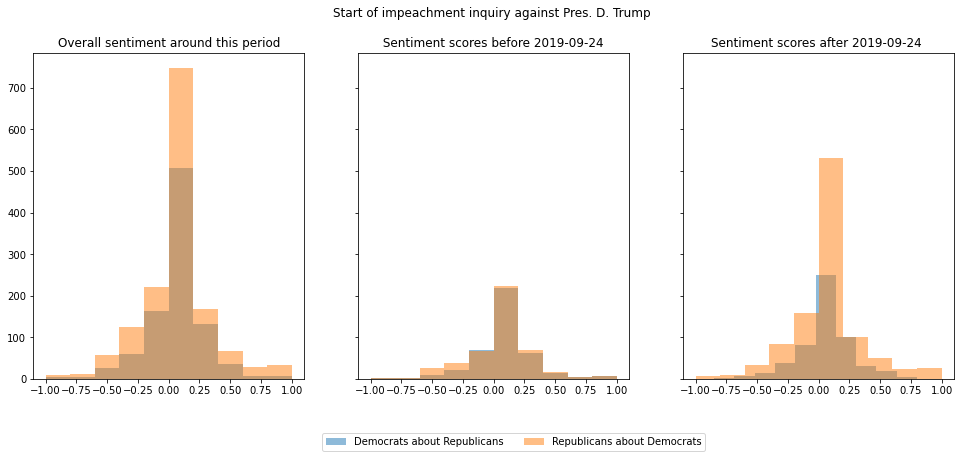

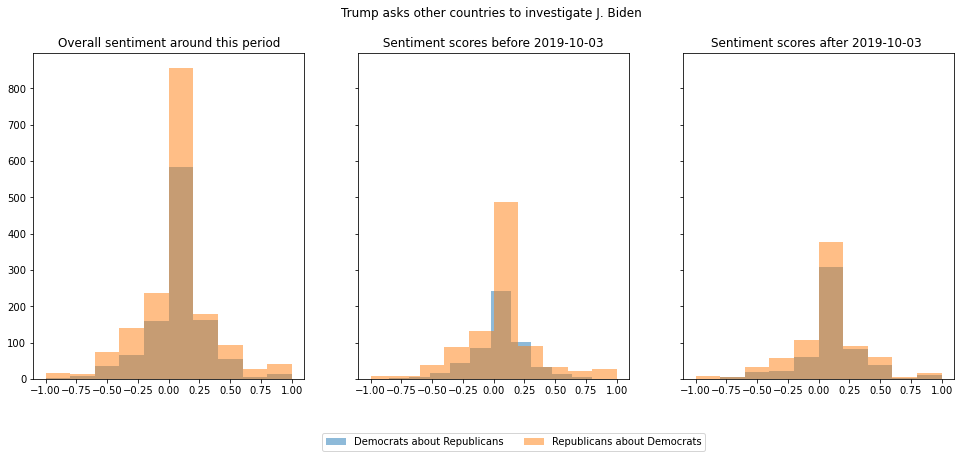

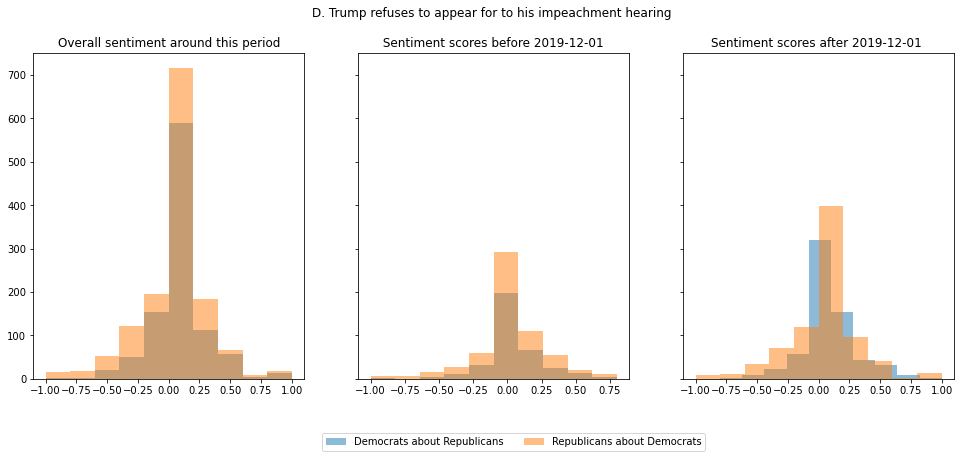

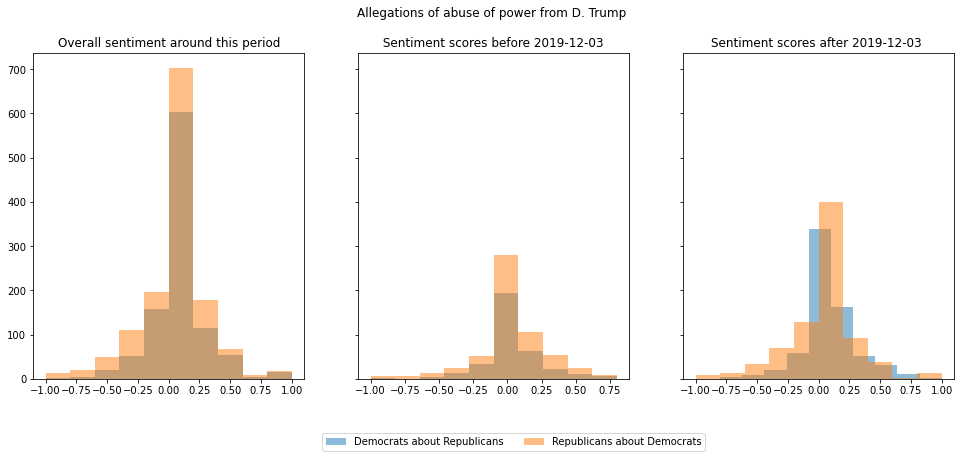

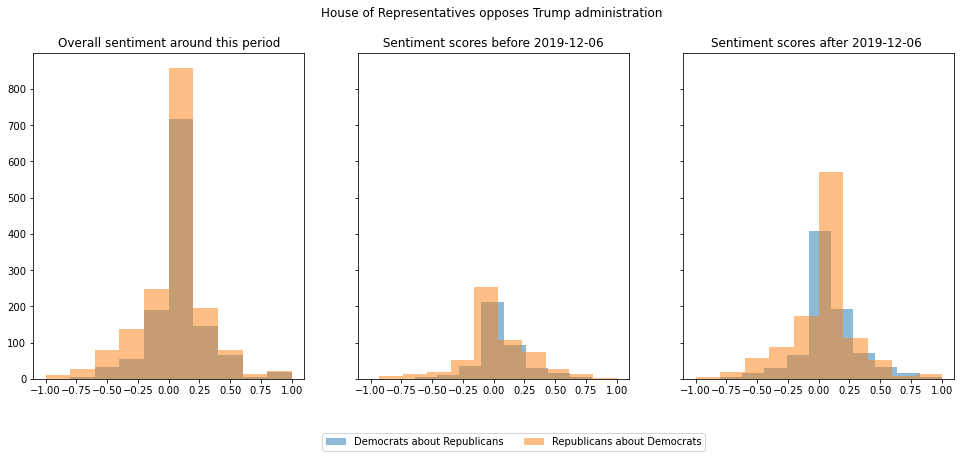

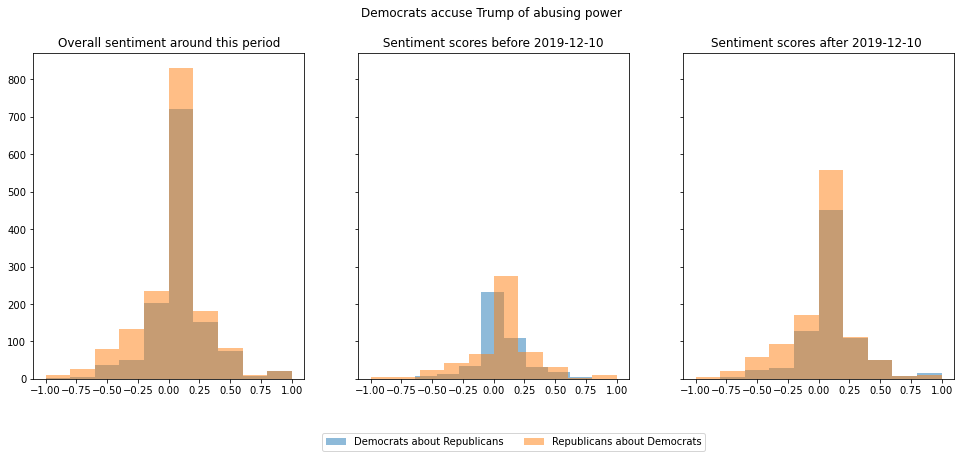

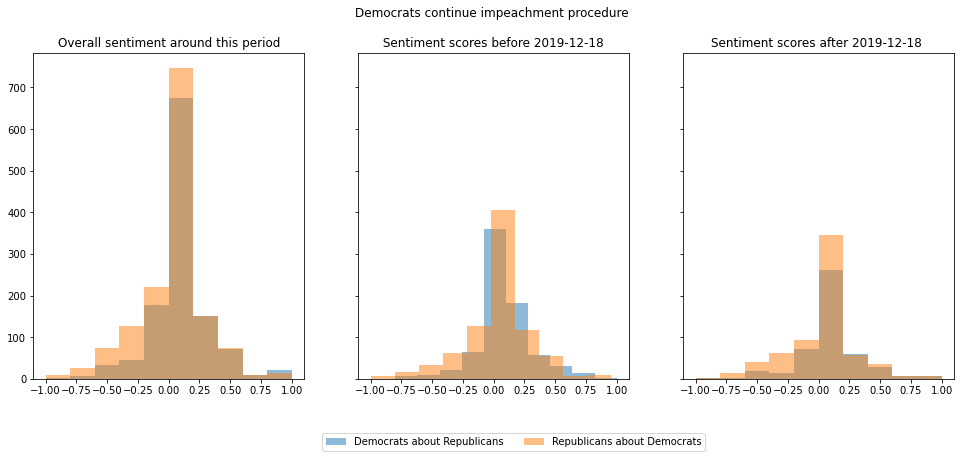

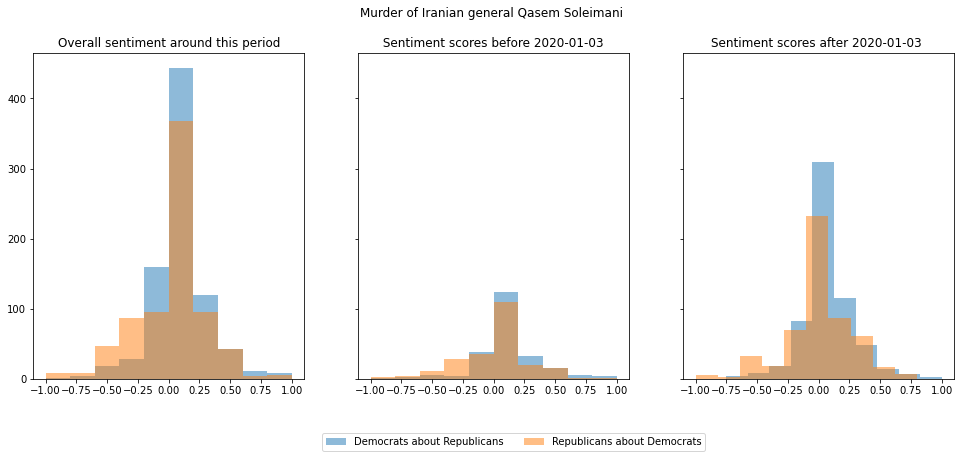

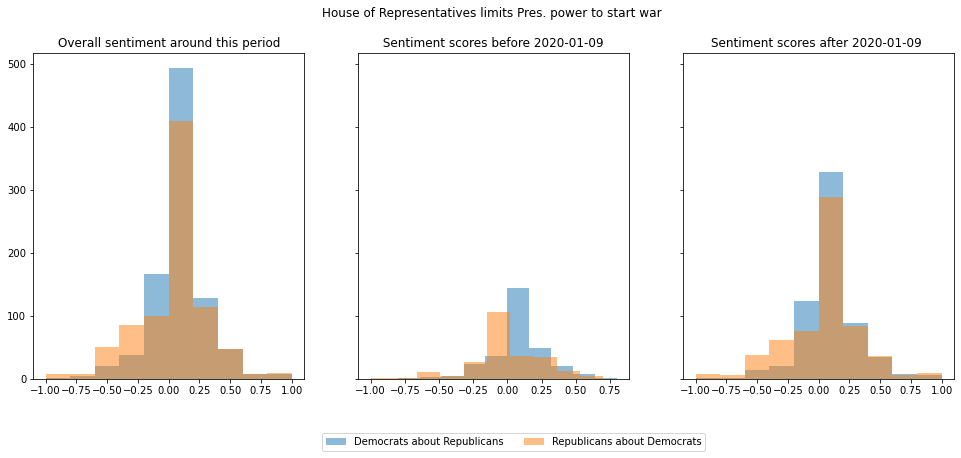

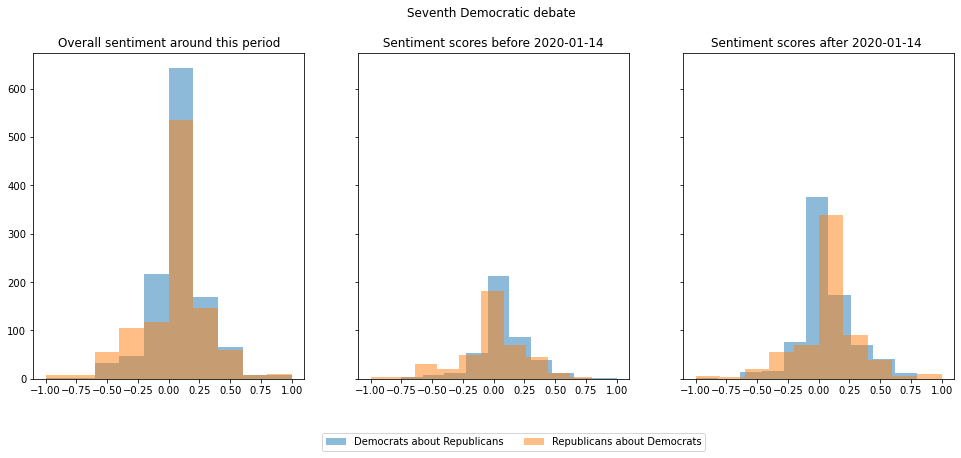

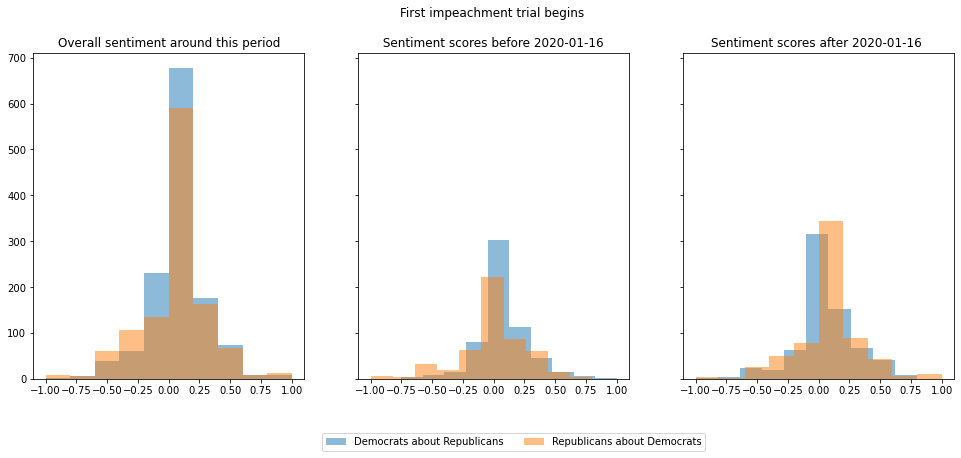

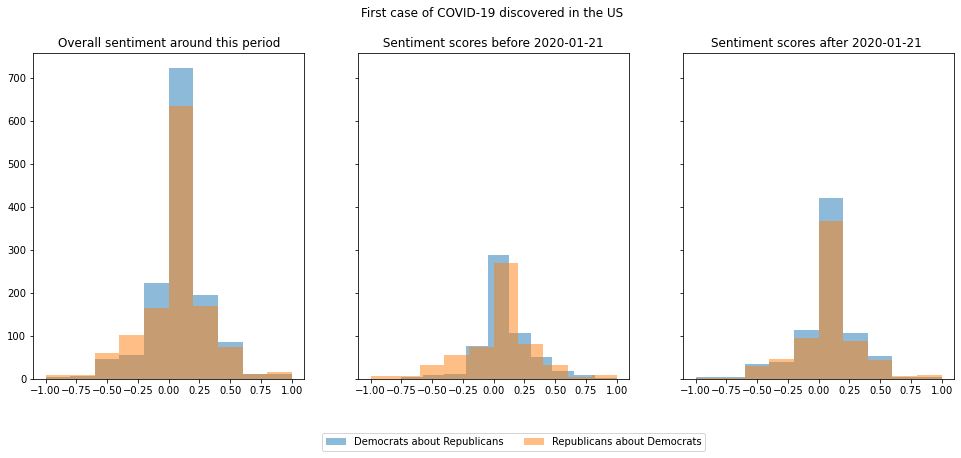

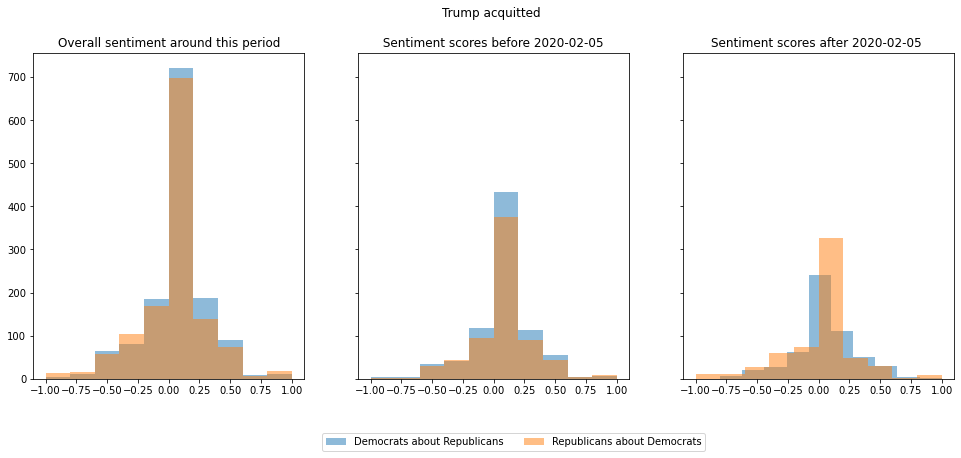

In [12]:
i = 0
for key_event in events.date:
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16.5,6))
    axes[0].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=2))) & (df_dem['date'] > (key_event - timedelta(weeks=2)))]['textblob_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[0].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=2))) & (df_rep['date'] > (key_event - timedelta(weeks=2)))]['textblob_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[0].set_title('Overall sentiment around this period')
    axes[1].hist(df_dem[(df_dem['date'] > (key_event - timedelta(weeks=2))) & (df_dem['date'] <= key_event)]['textblob_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[1].hist(df_rep[(df_rep['date'] > (key_event - timedelta(weeks=2))) & (df_rep['date'] <= key_event)]['textblob_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[1].set_title('{} \n \n Sentiment scores before {} '.format(events[events['date'] == key_event]['short_desc'][i], key_event.date()))
    axes[2].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=2))) & (df_dem['date'] >= key_event)]['textblob_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[2].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=2))) & (df_rep['date'] >= key_event)]['textblob_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[2].set_title('Sentiment scores after {} '.format(key_event.date()))
    axes[0].legend(bbox_to_anchor =(2.5, -0.15), ncol = 2)
    i = i + 1

### 1 week prior and after event

C:\Users\rened\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


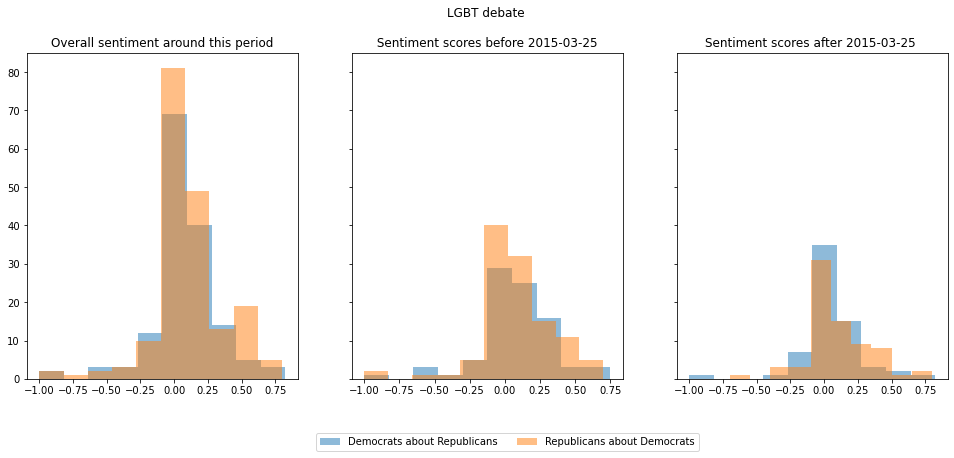

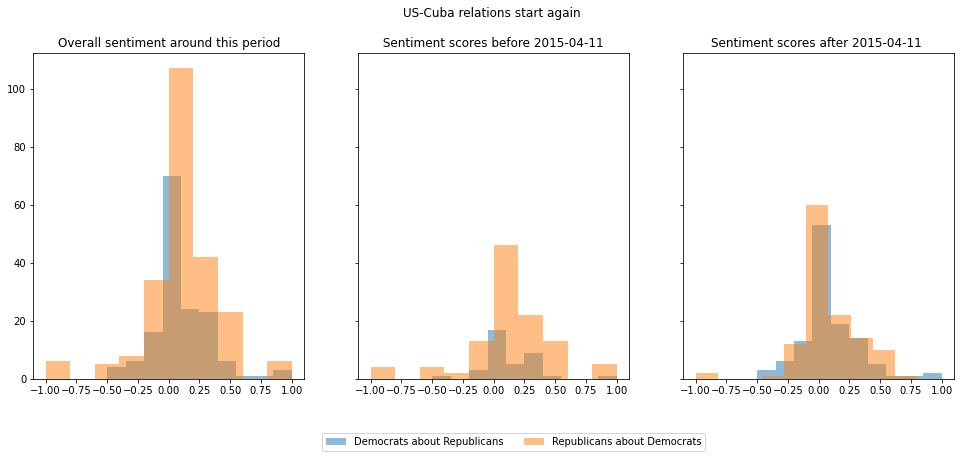

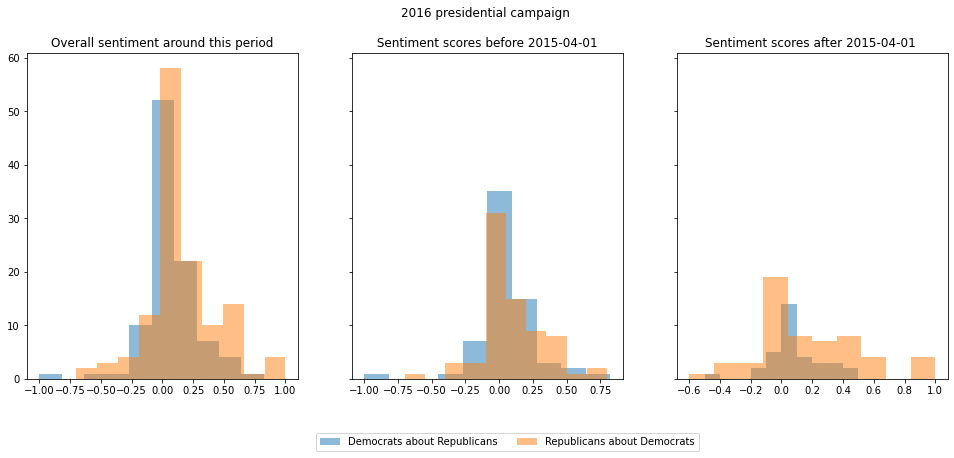

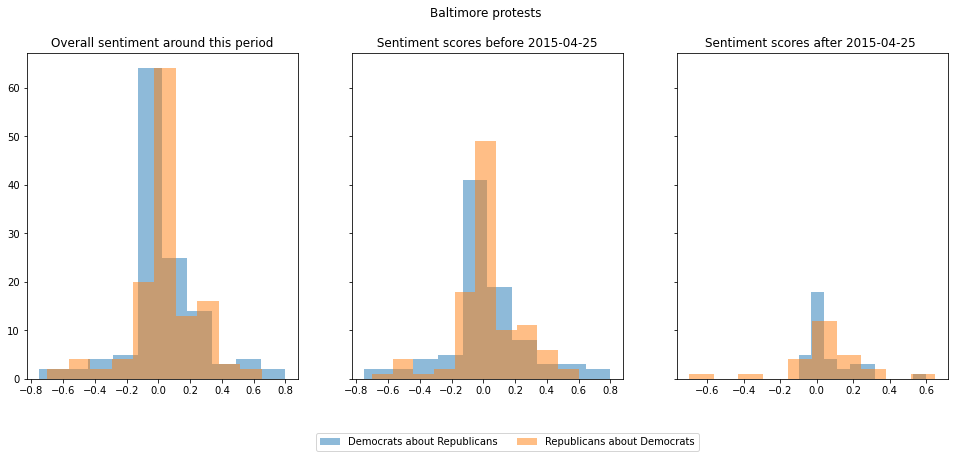

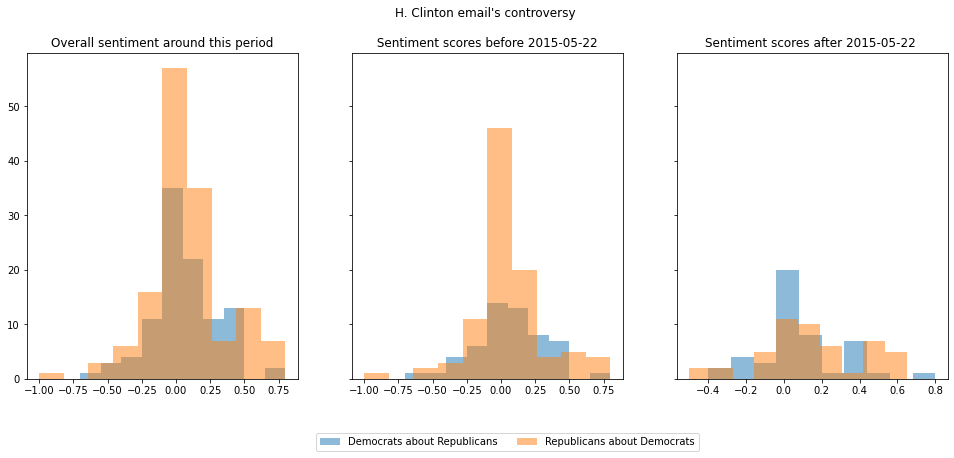

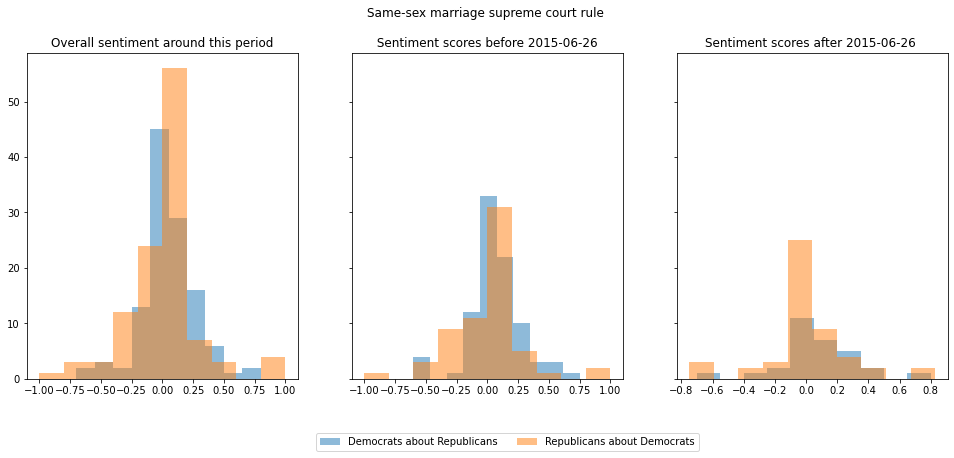

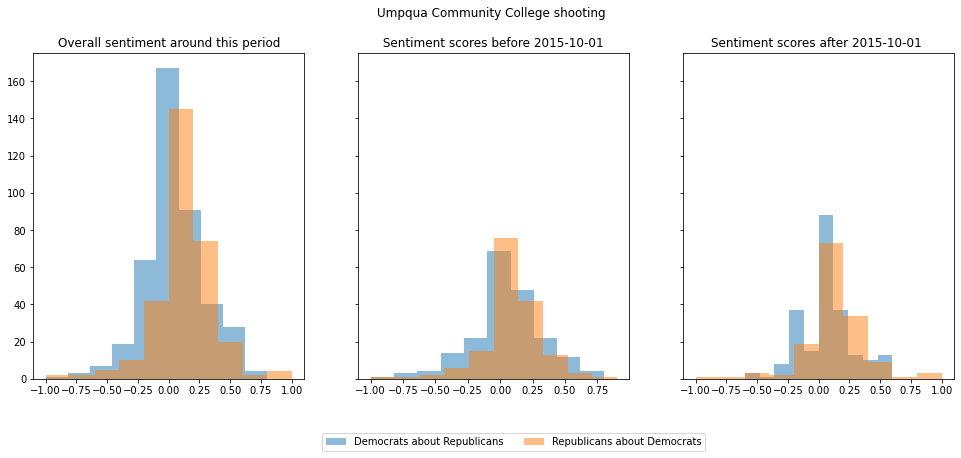

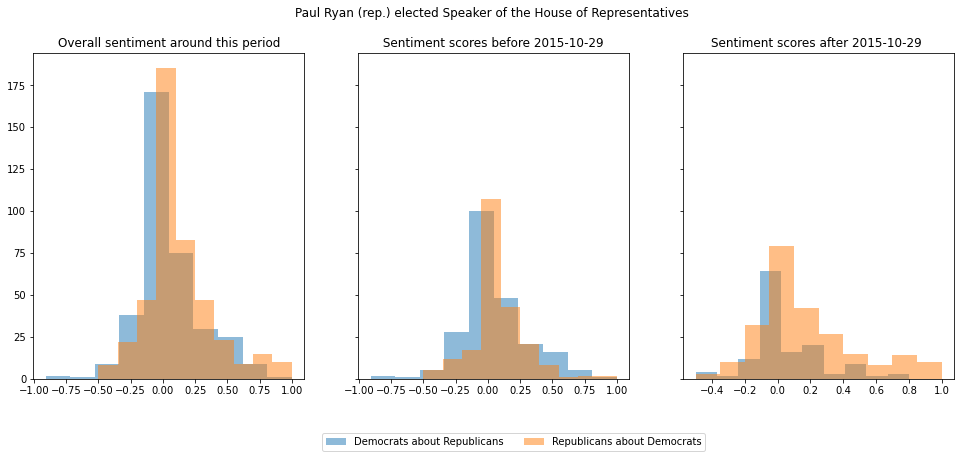

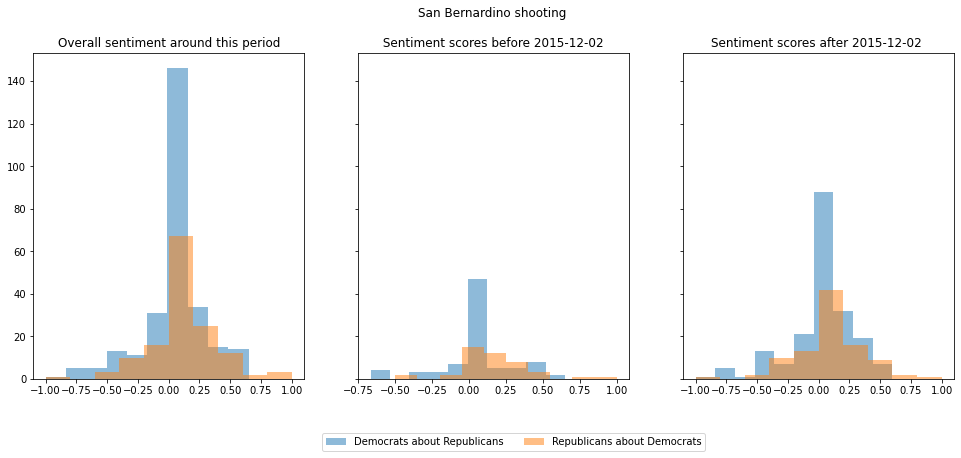

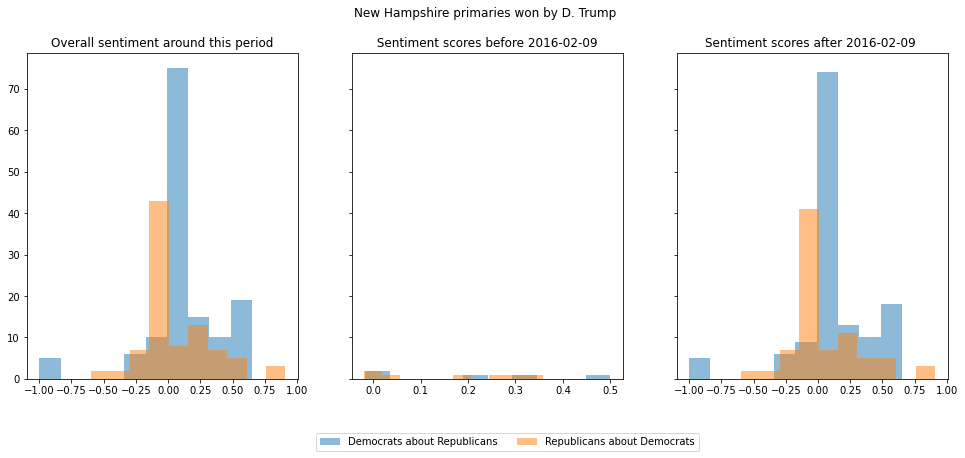

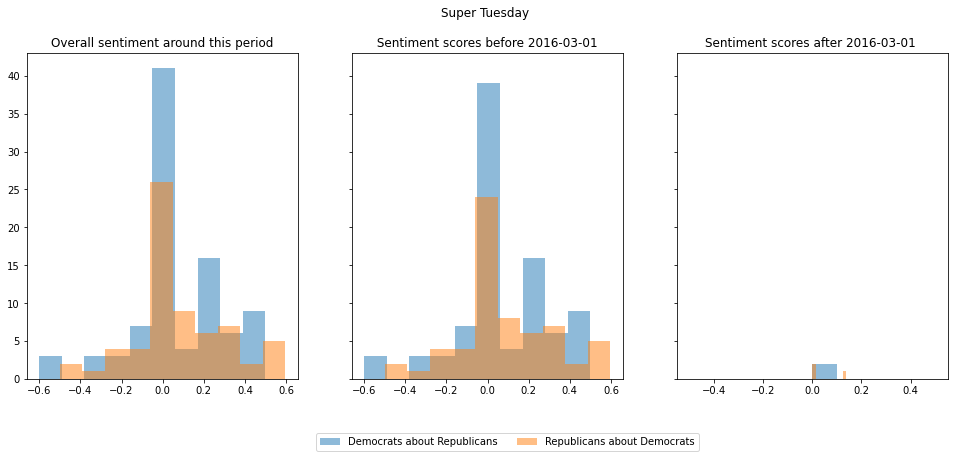

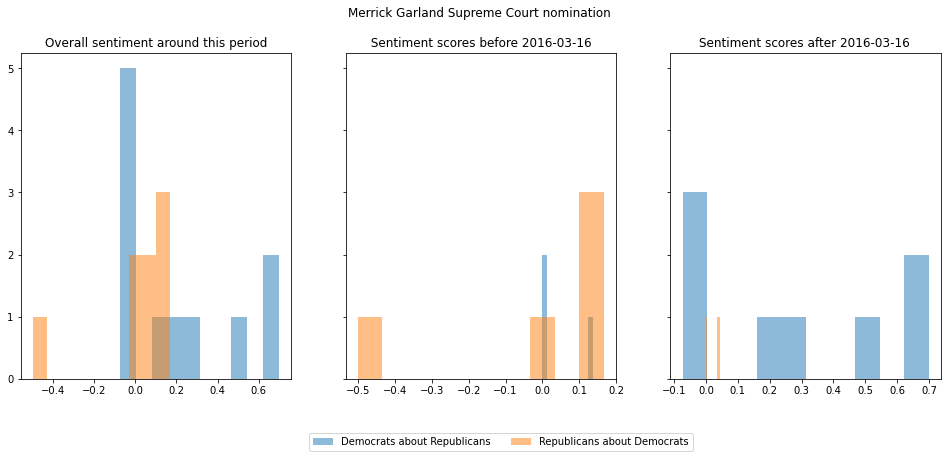

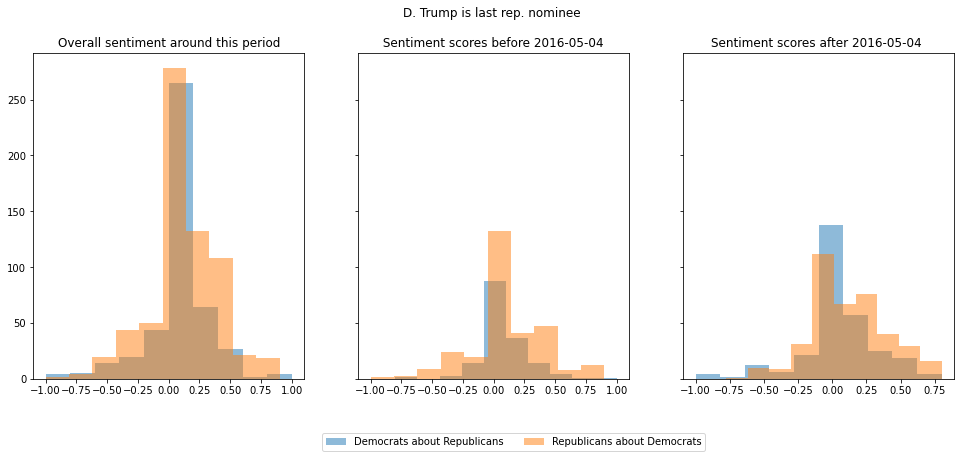

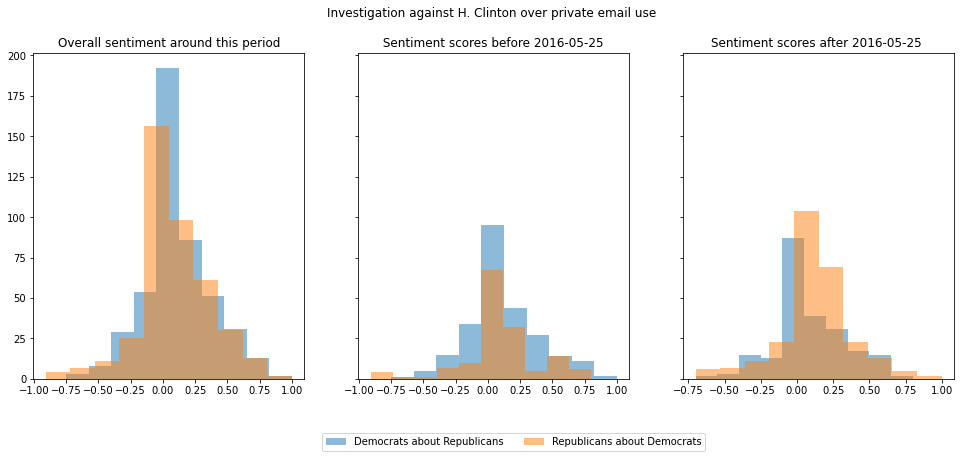

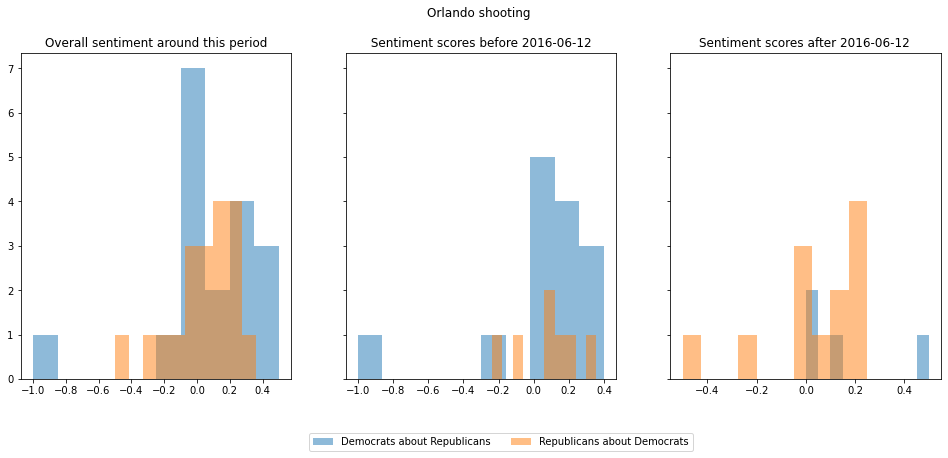

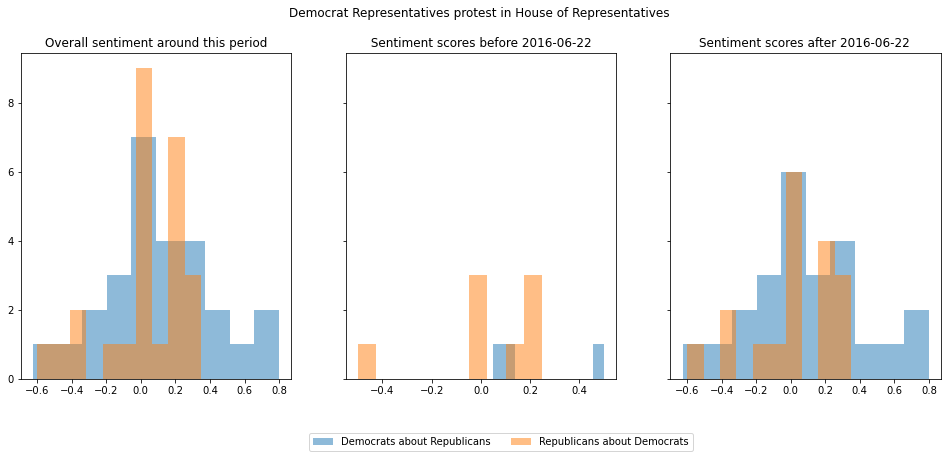

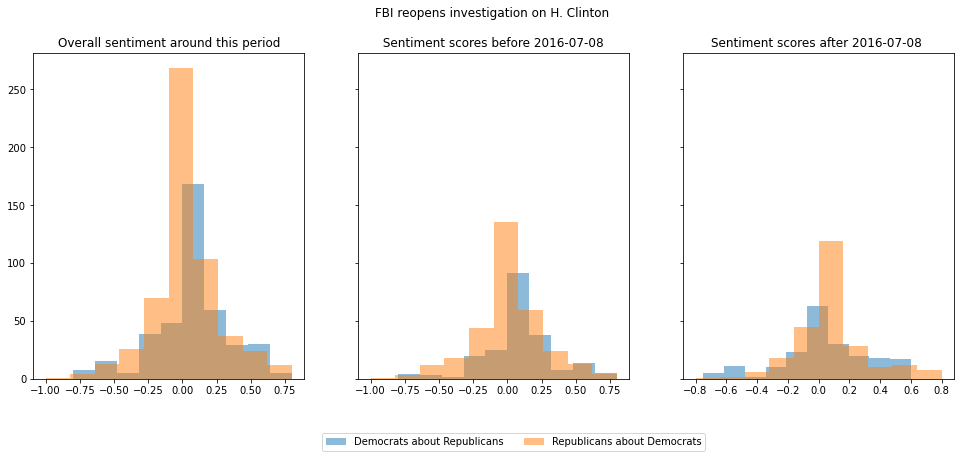

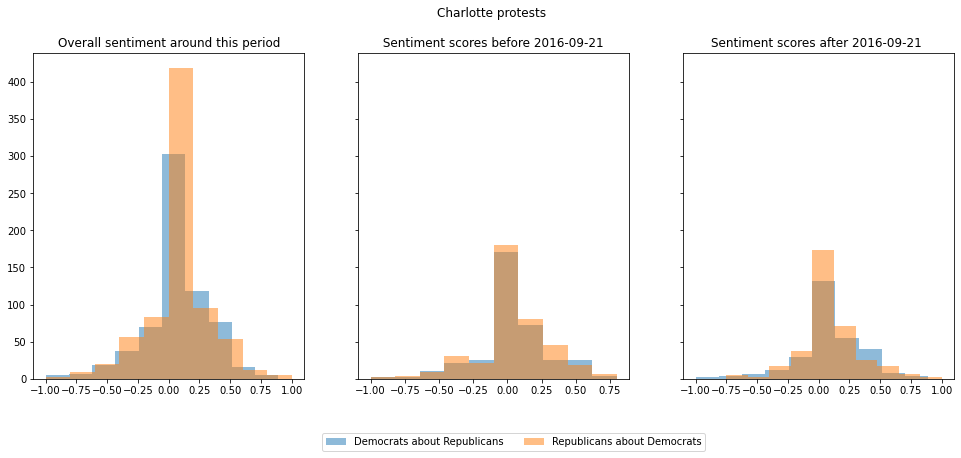

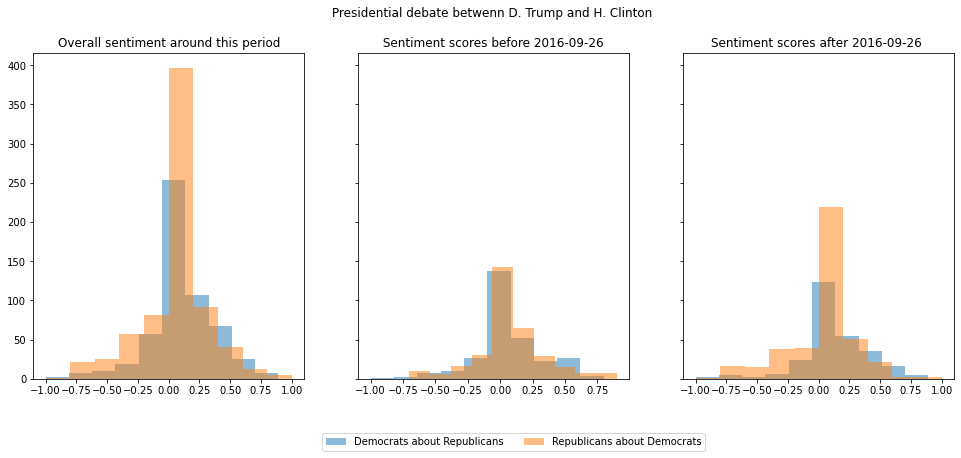

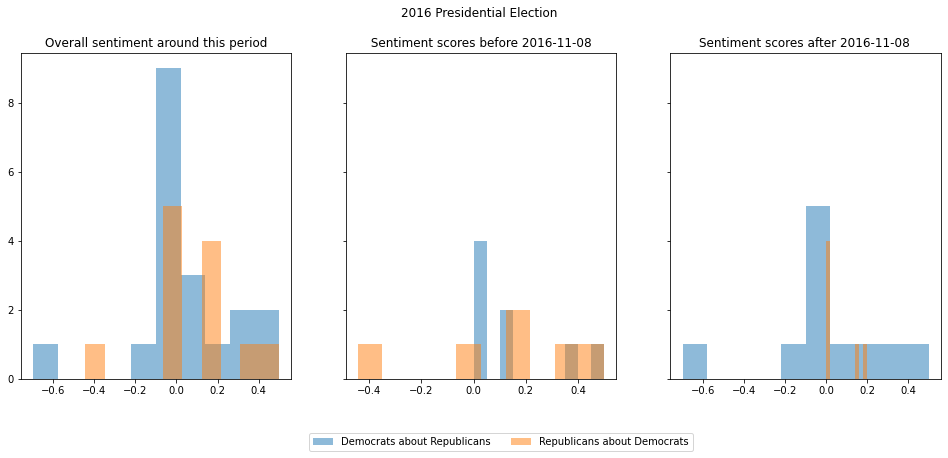

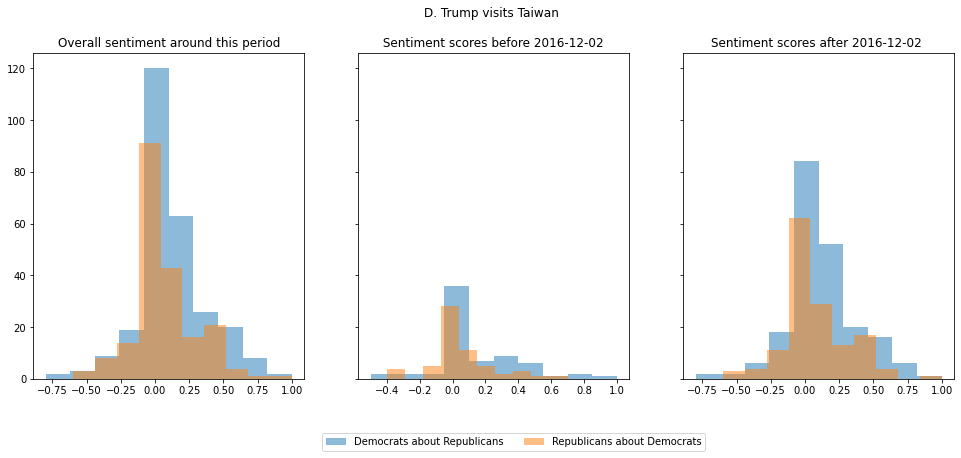

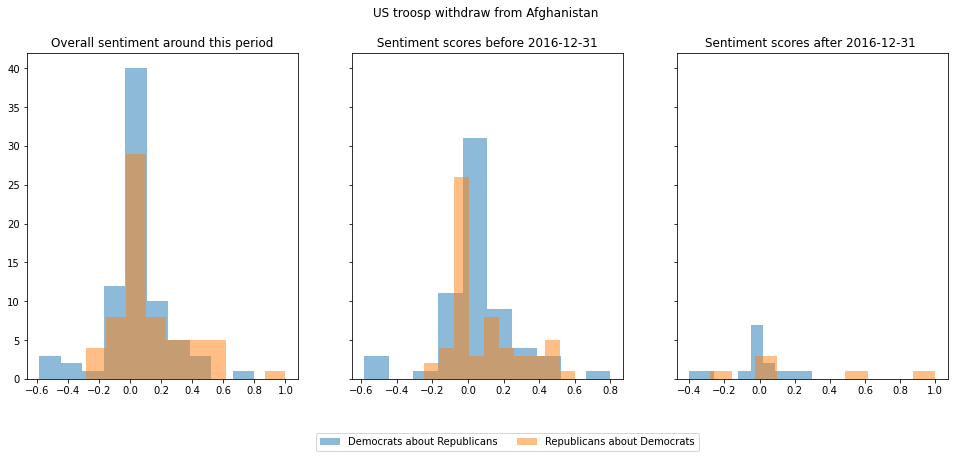

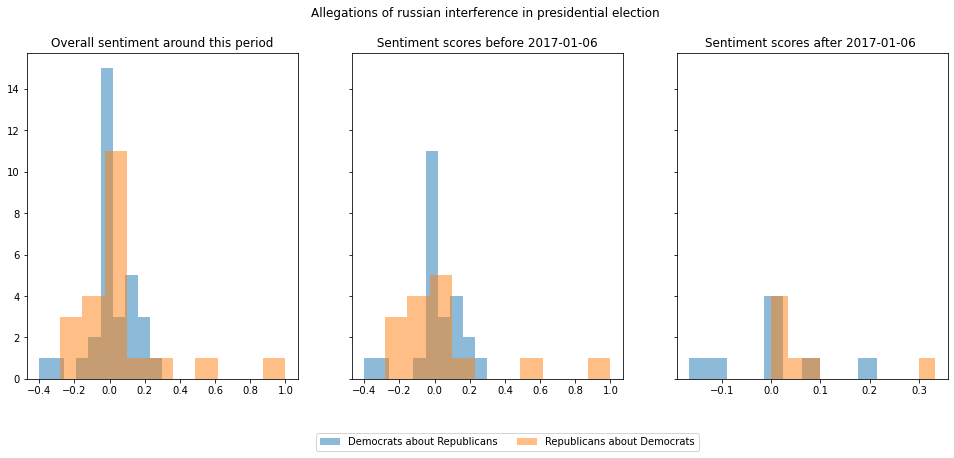

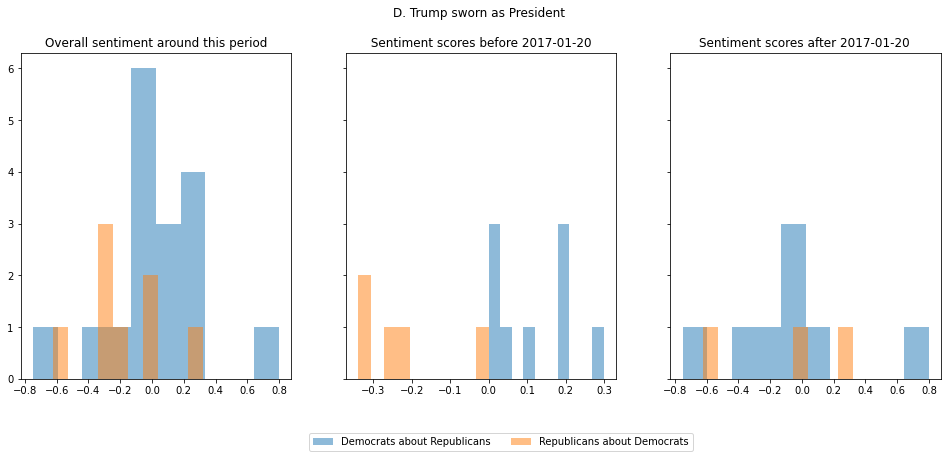

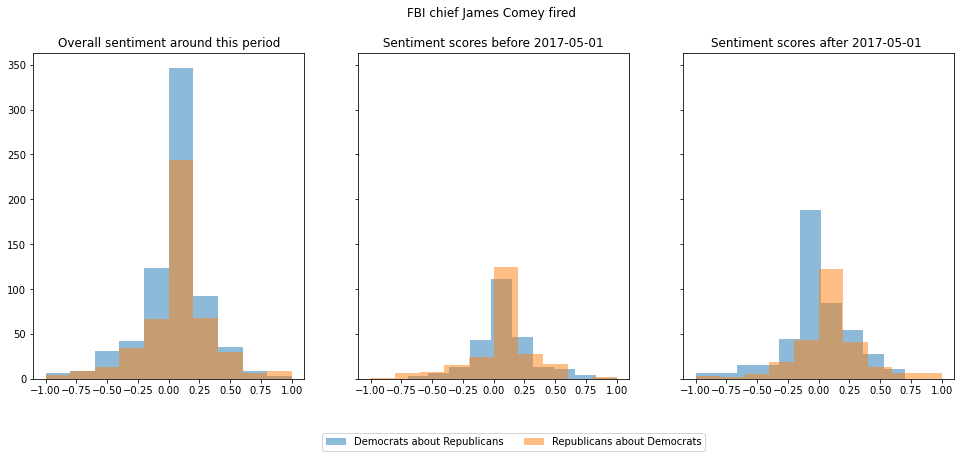

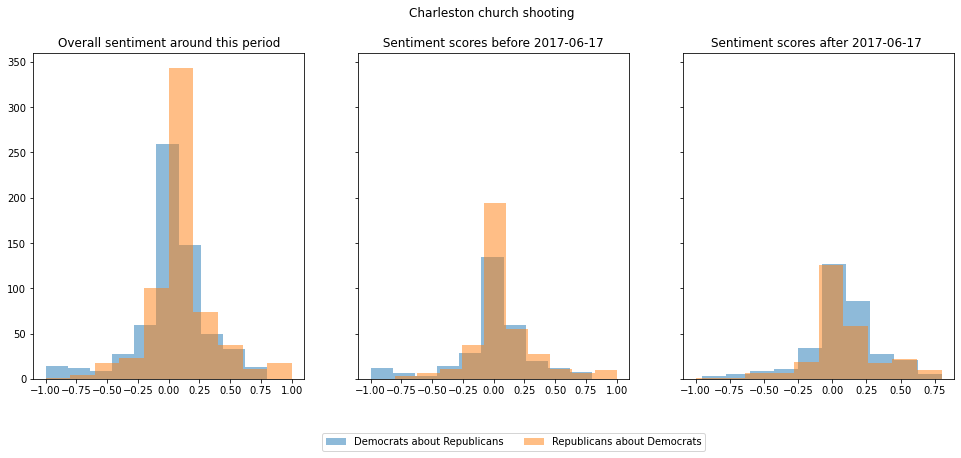

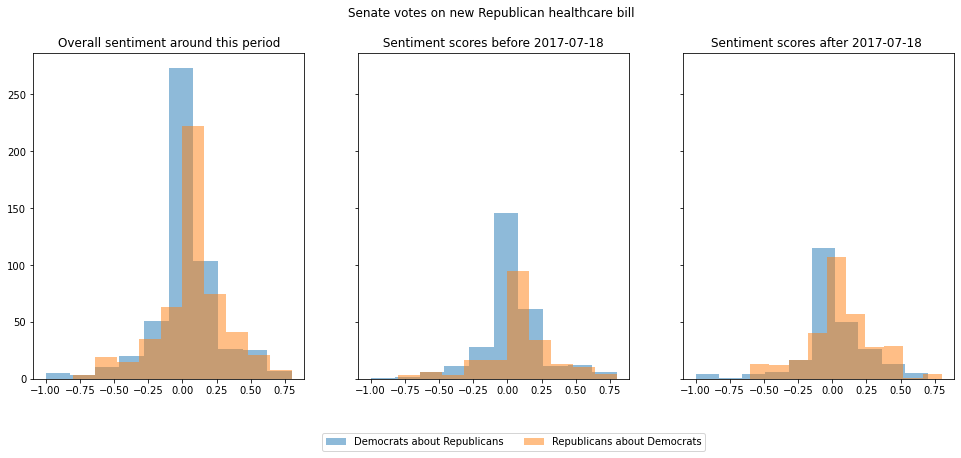

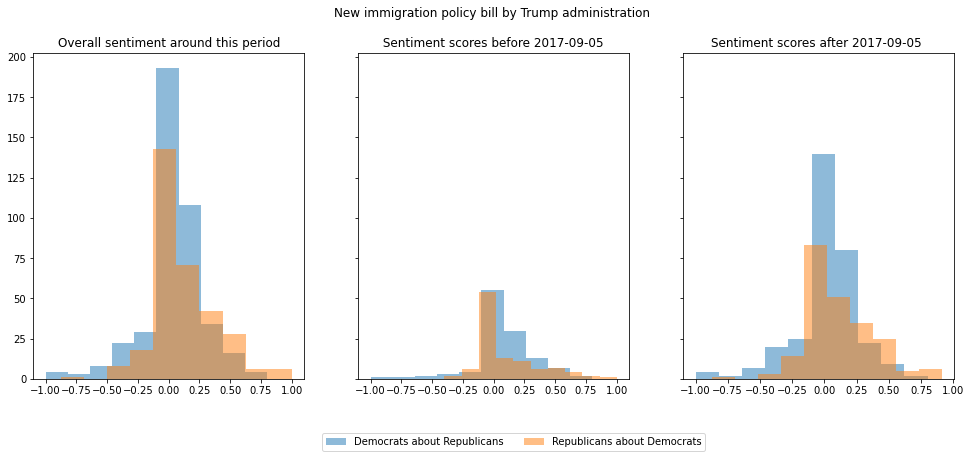

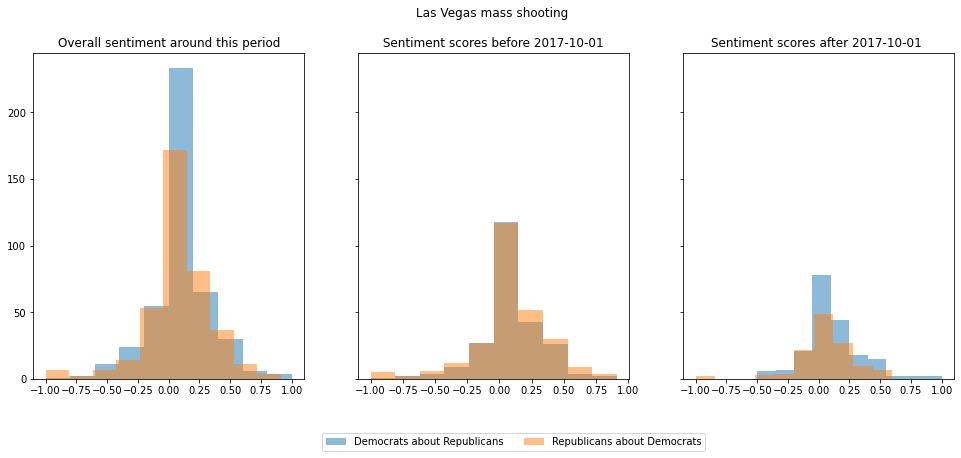

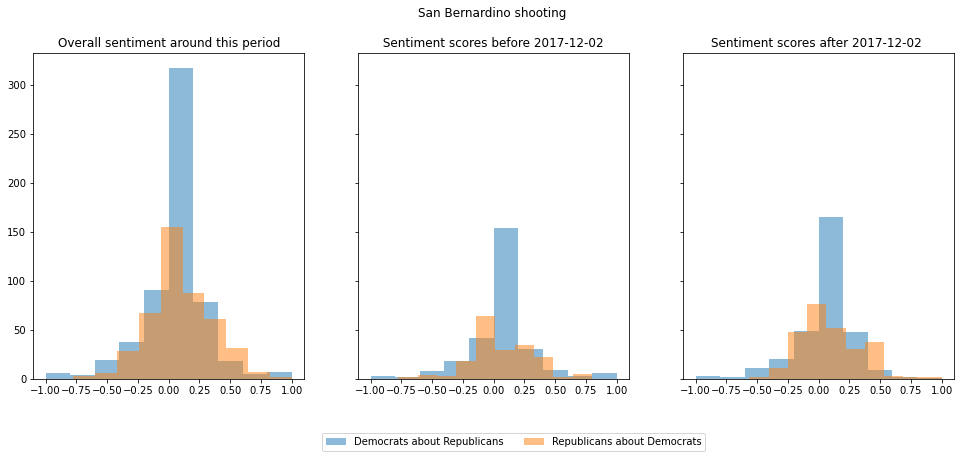

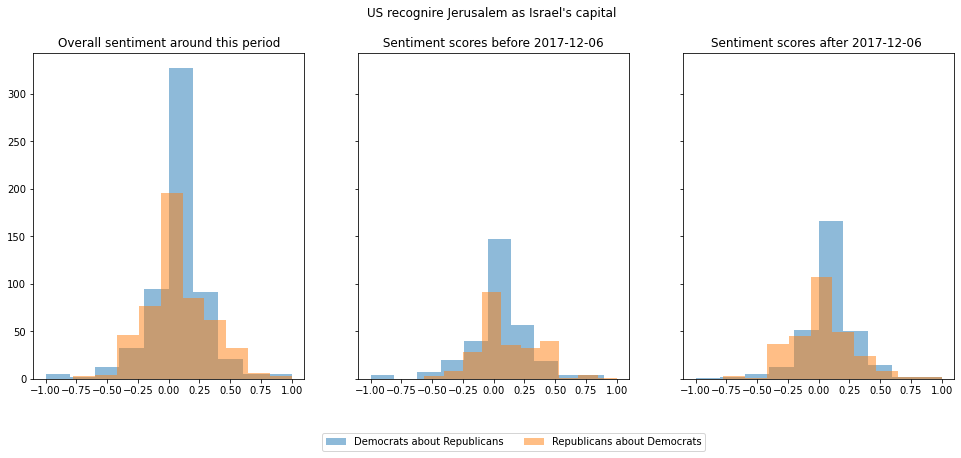

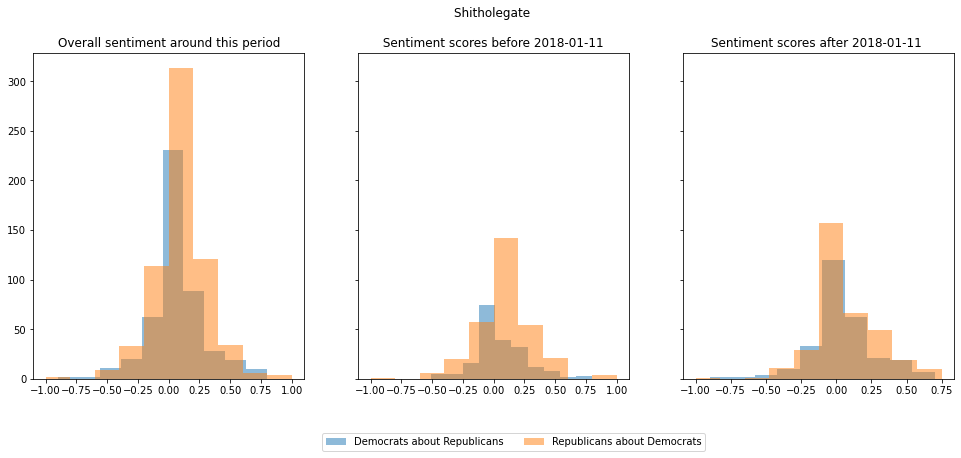

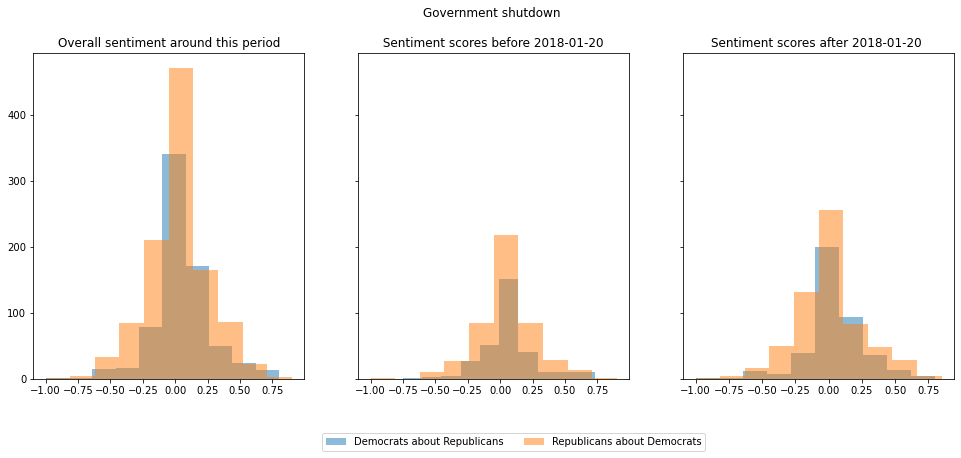

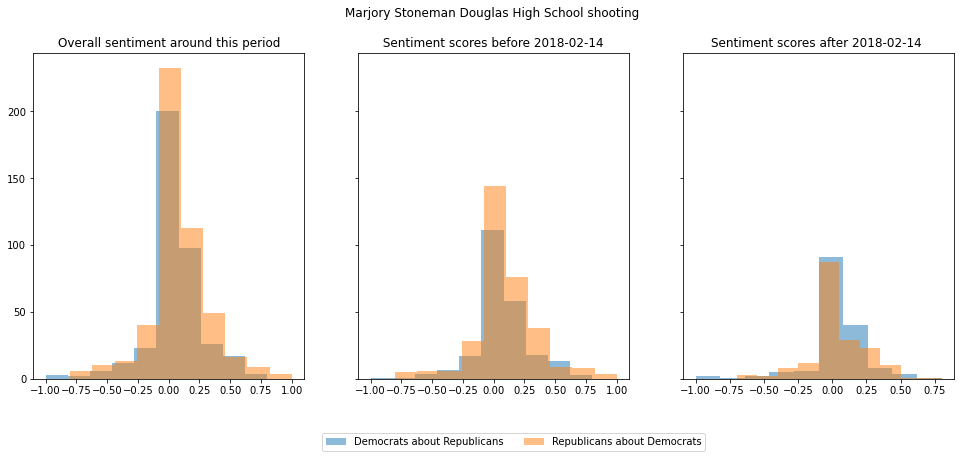

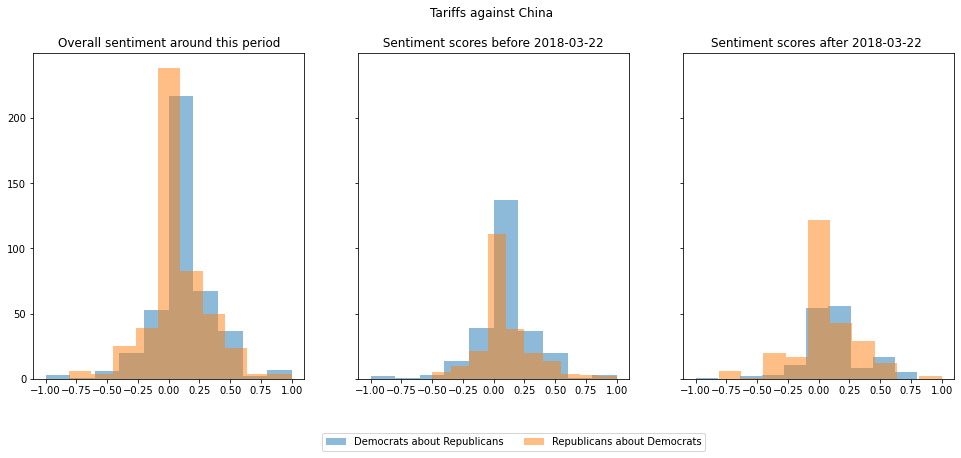

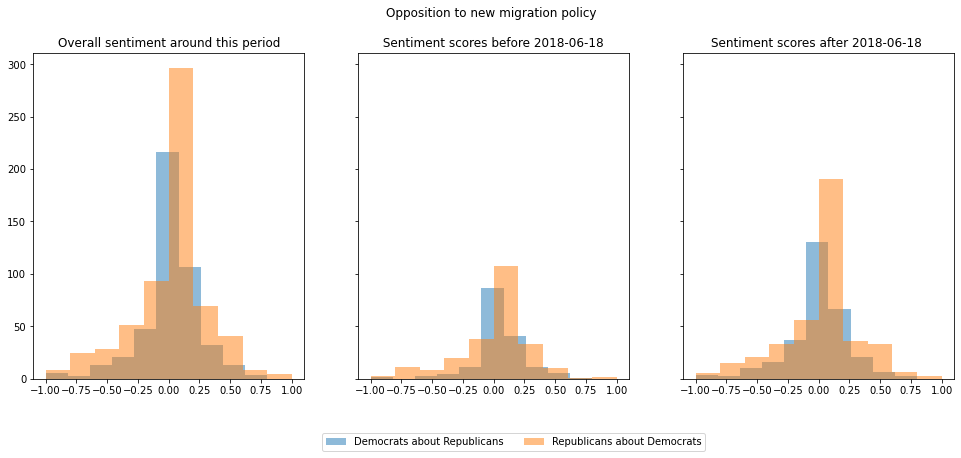

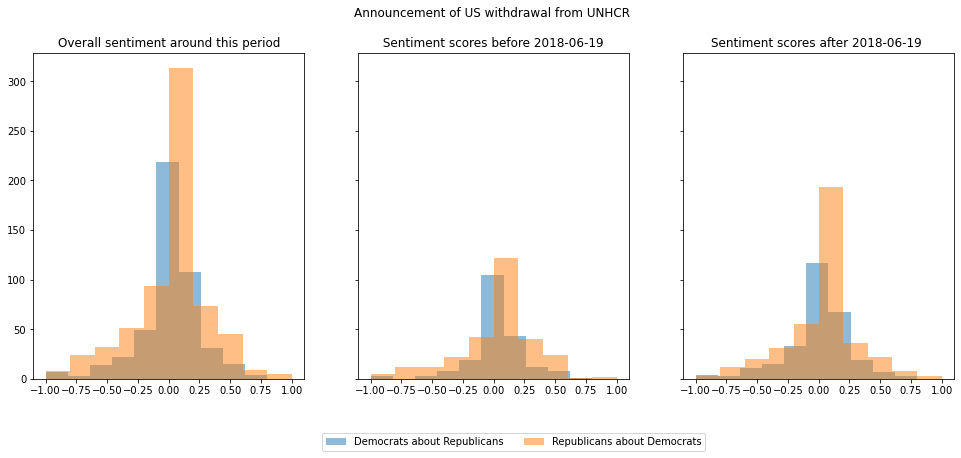

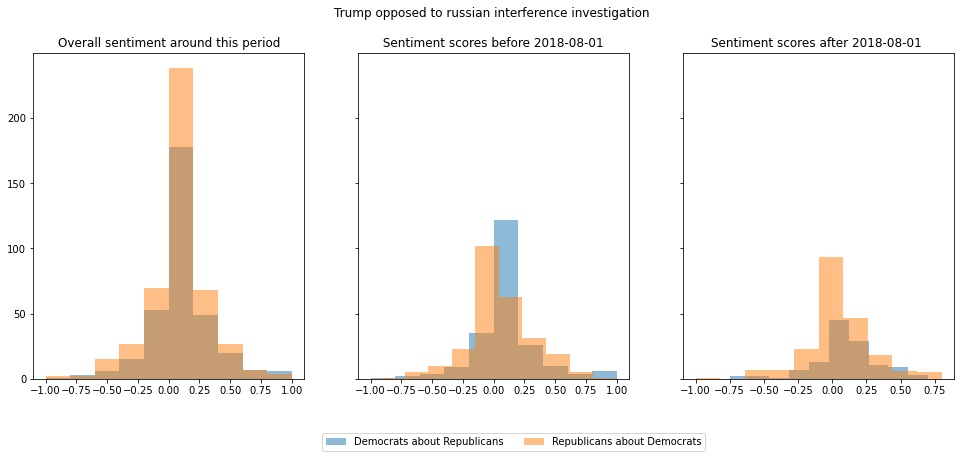

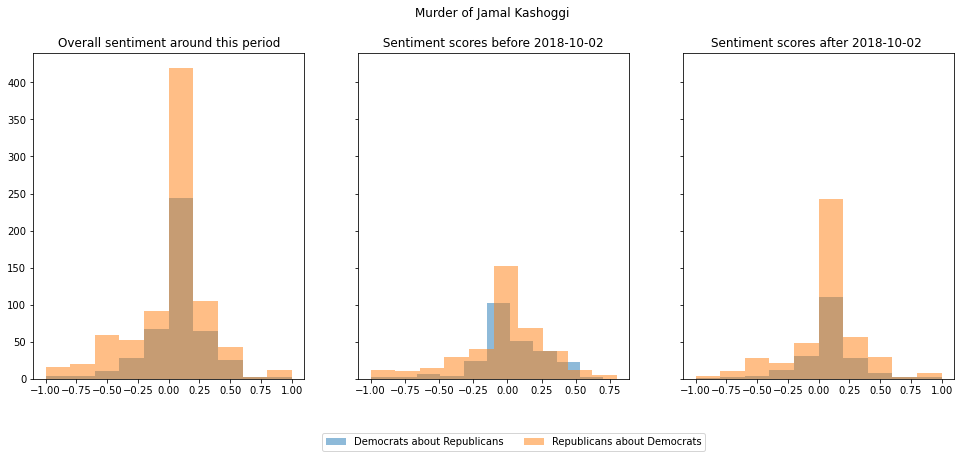

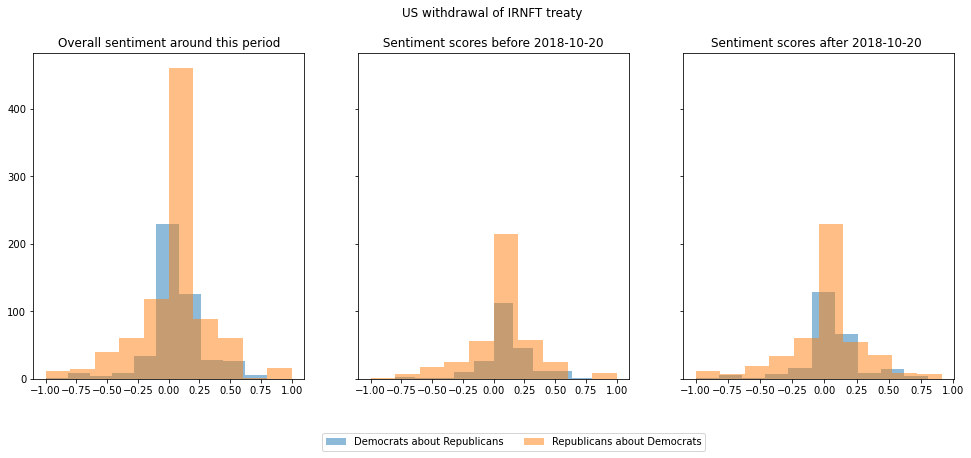

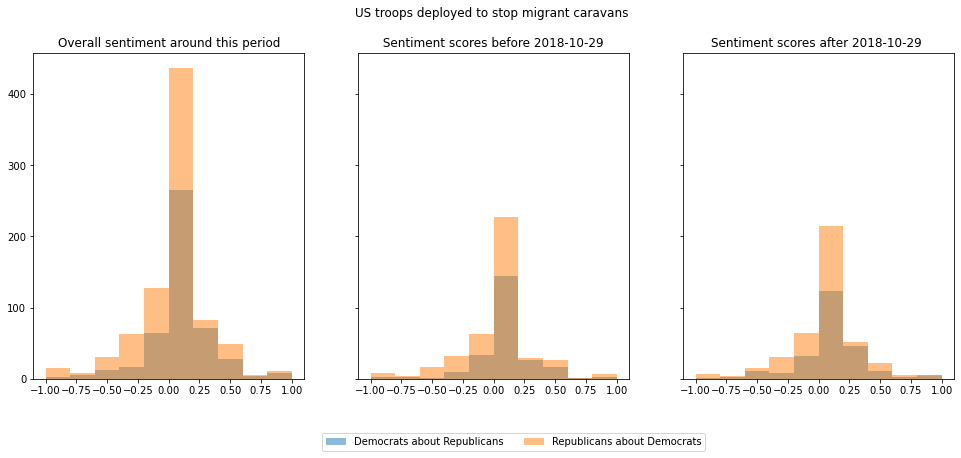

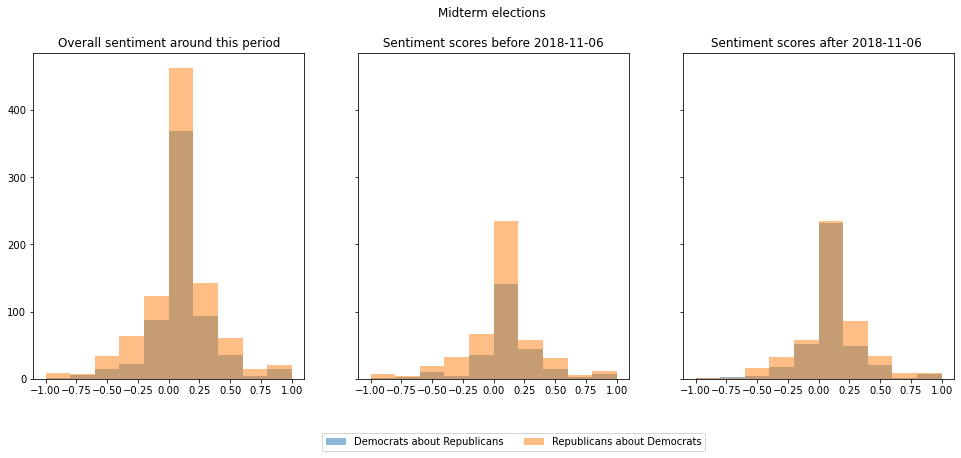

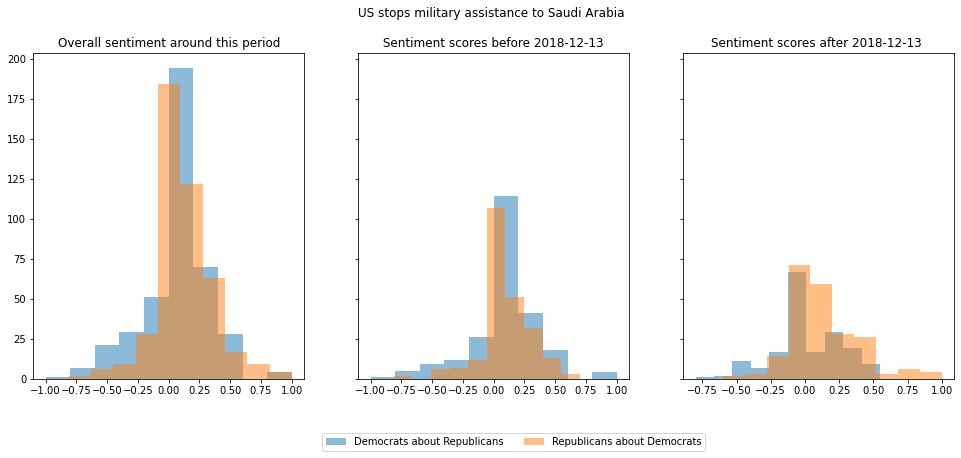

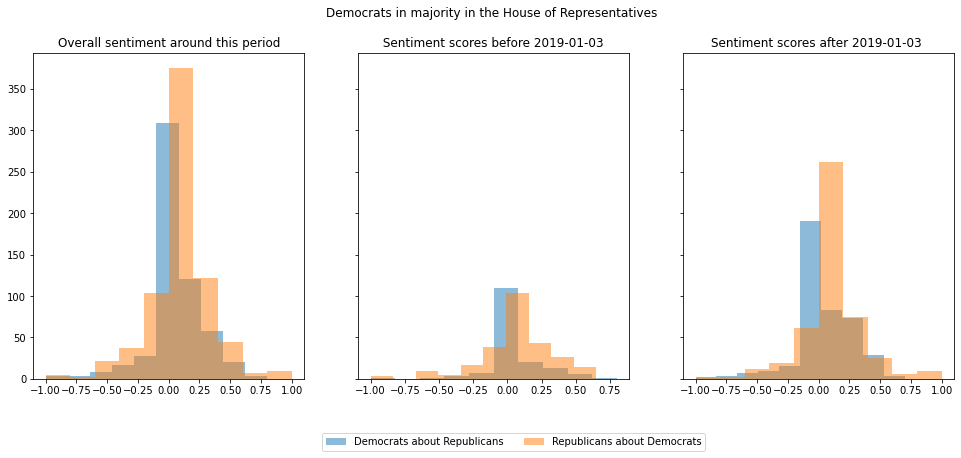

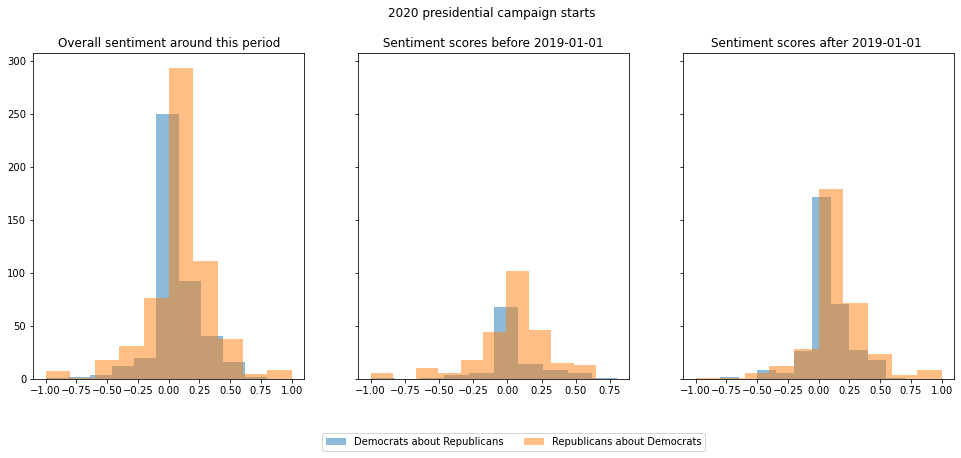

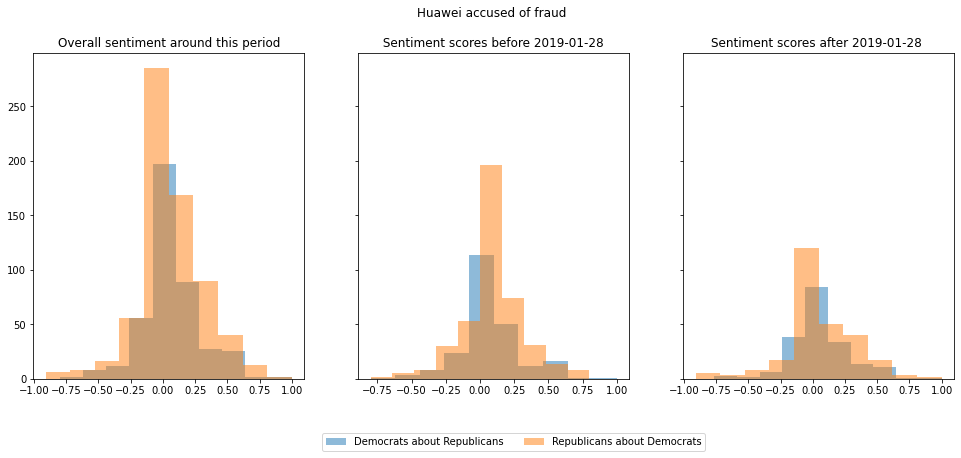

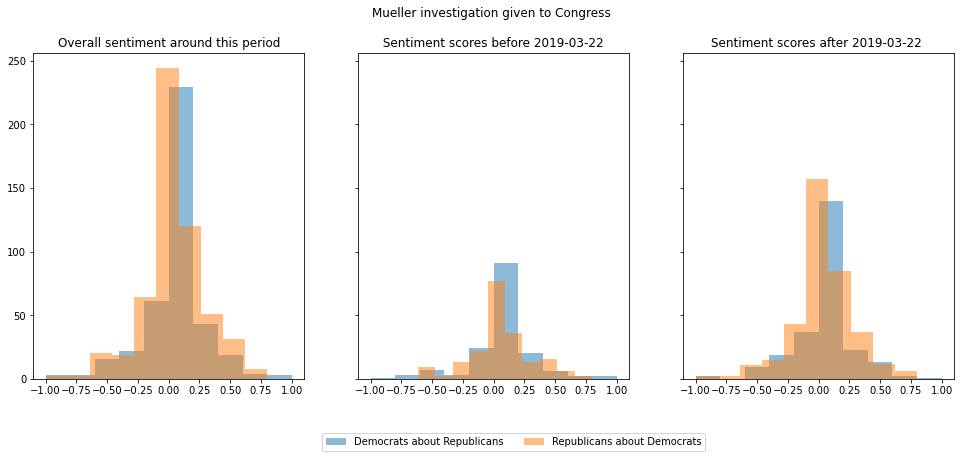

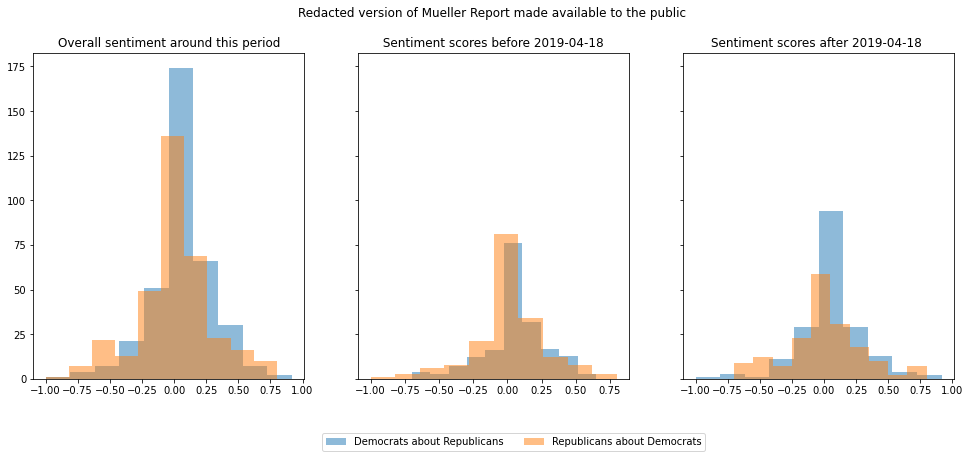

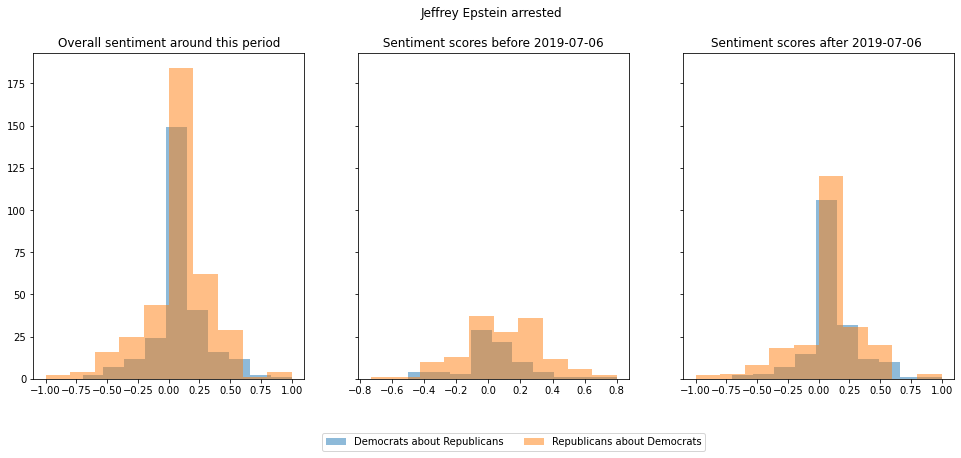

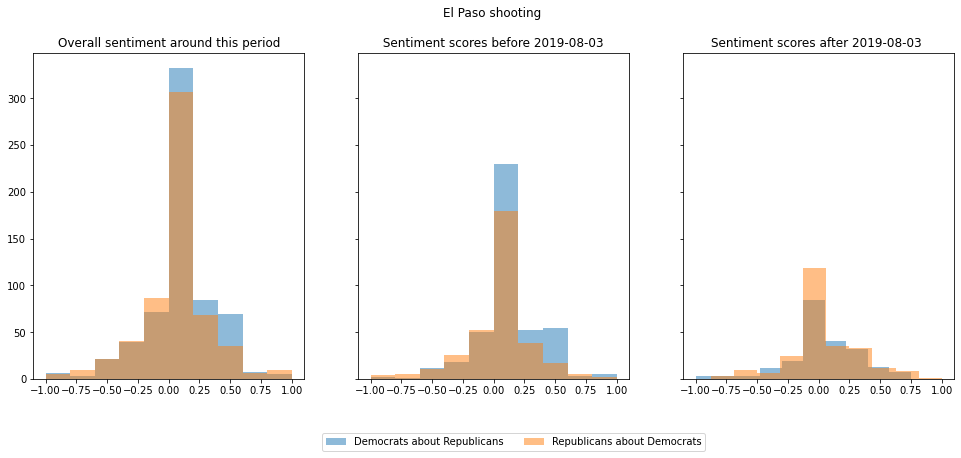

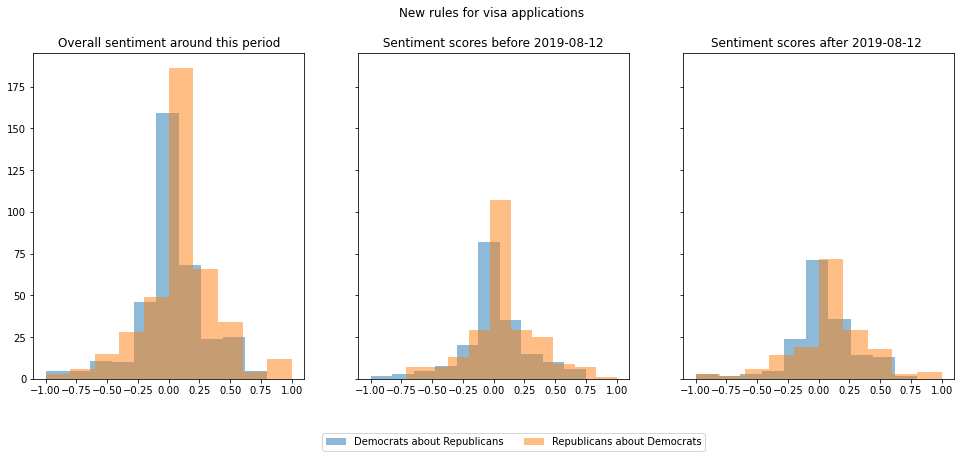

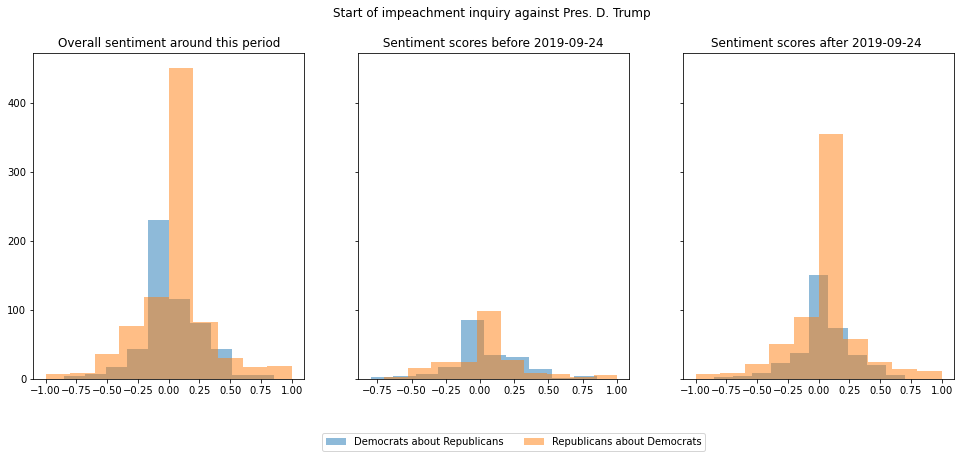

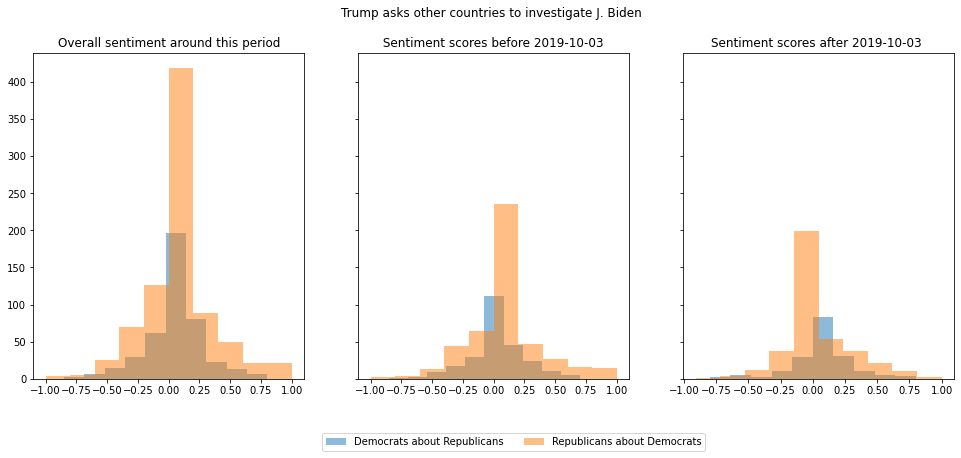

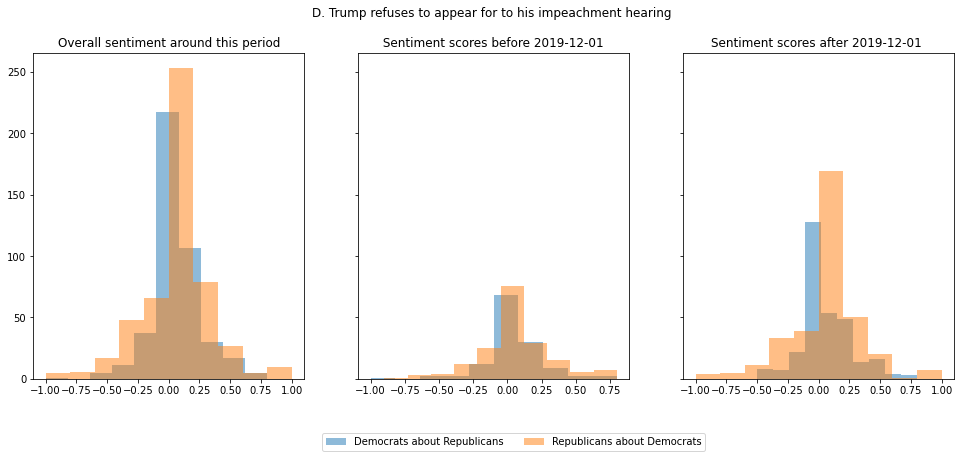

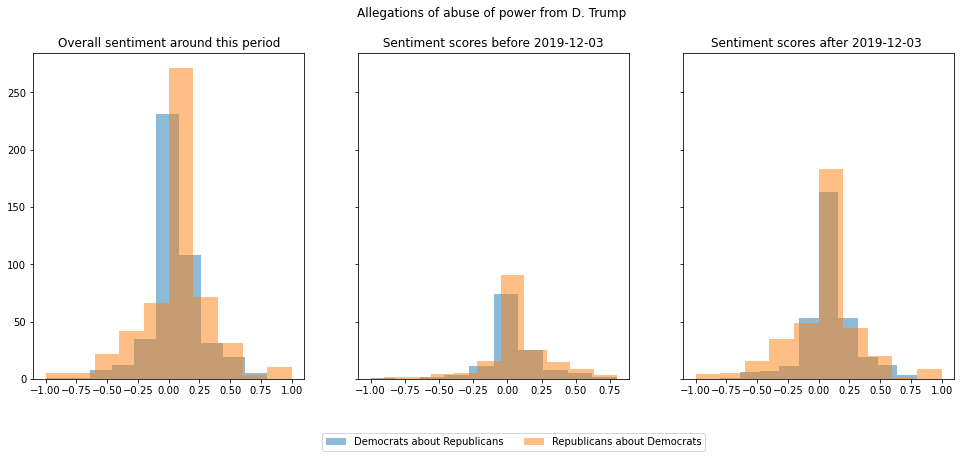

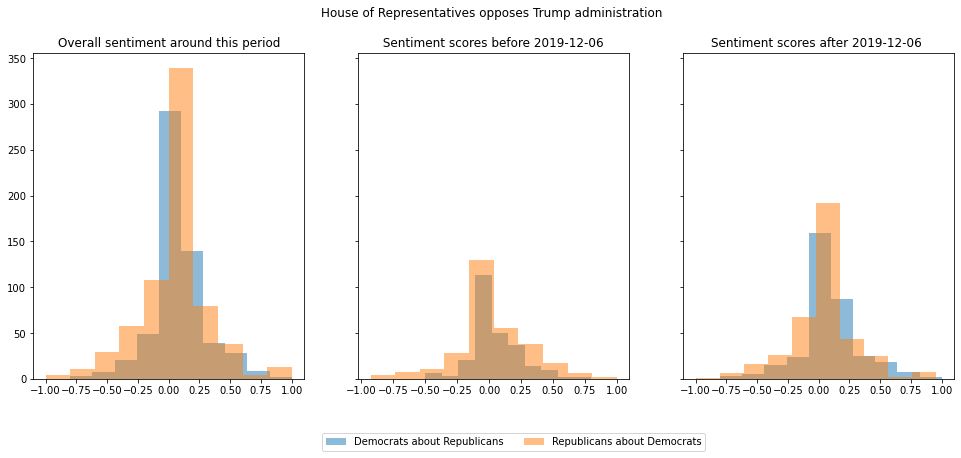

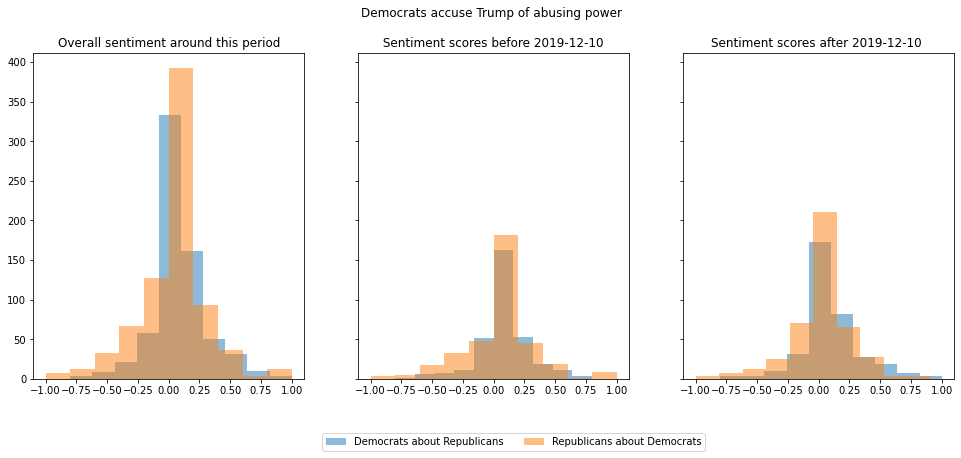

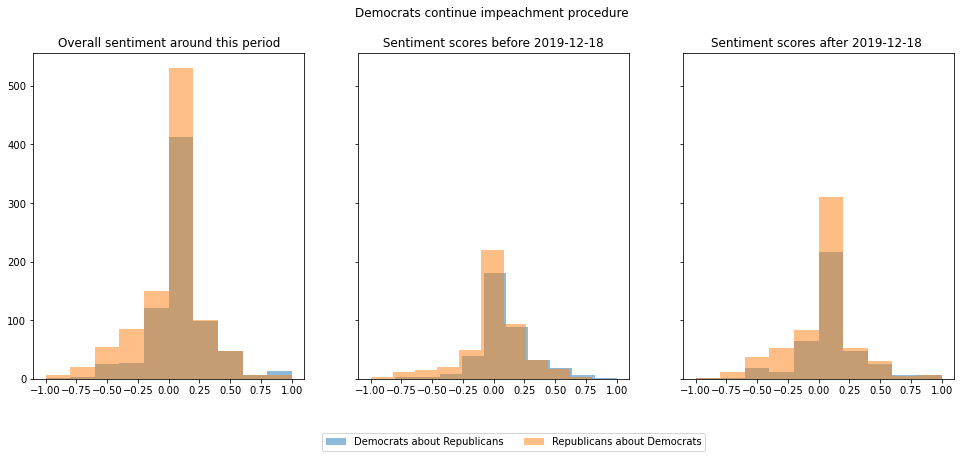

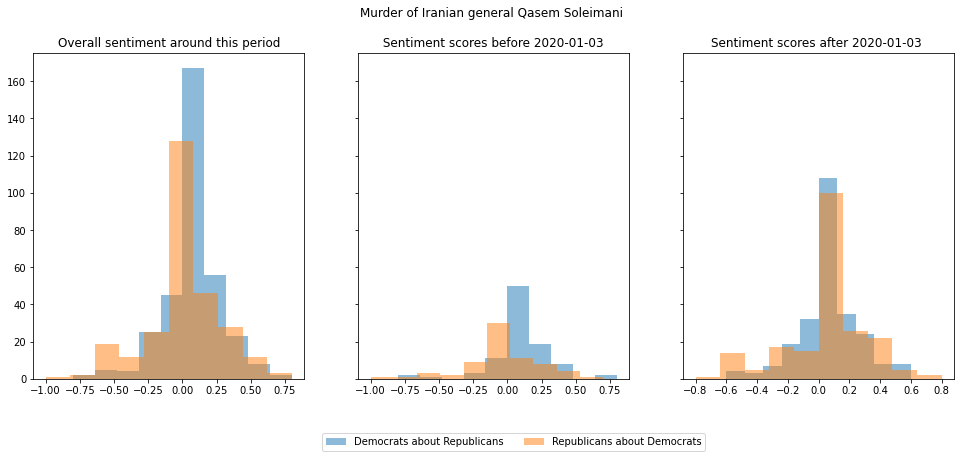

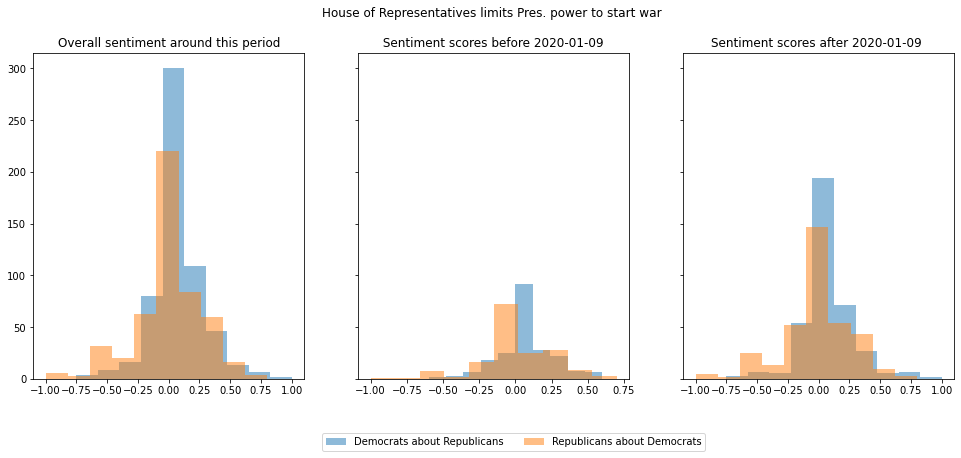

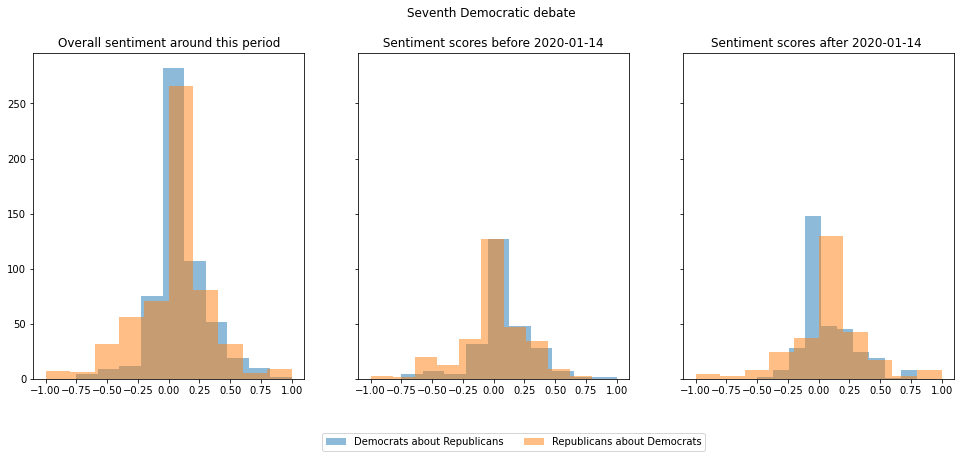

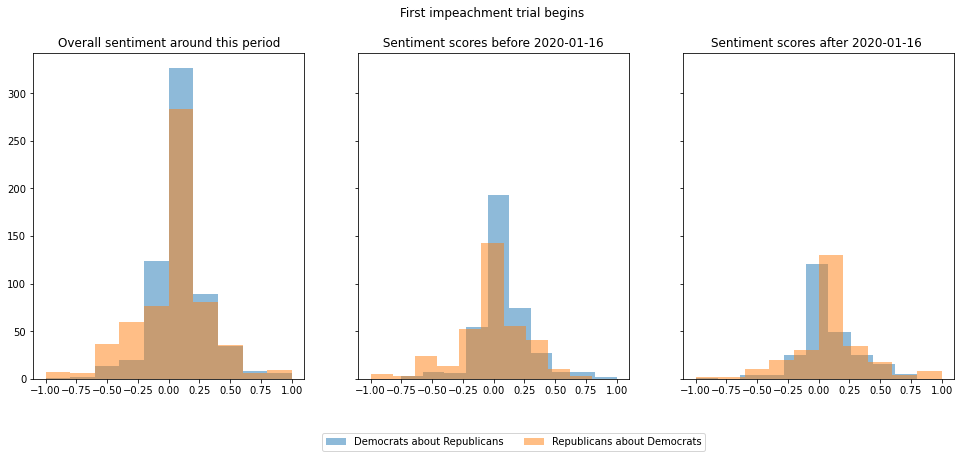

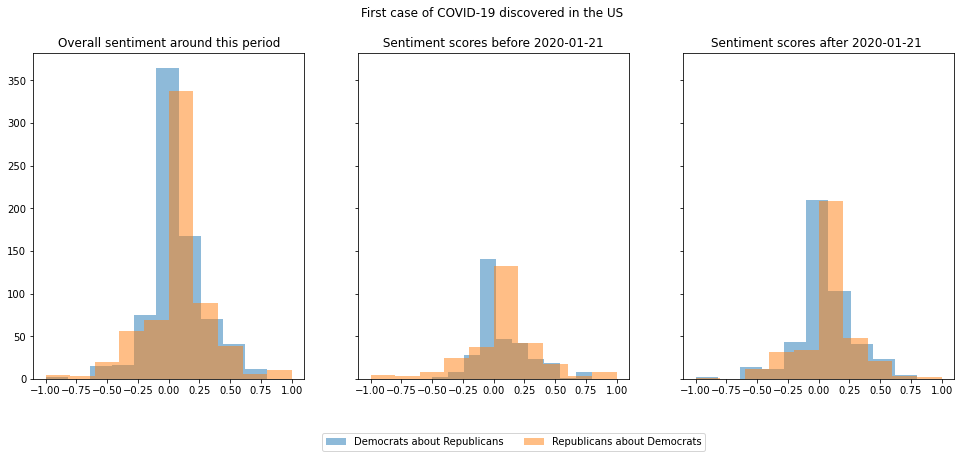

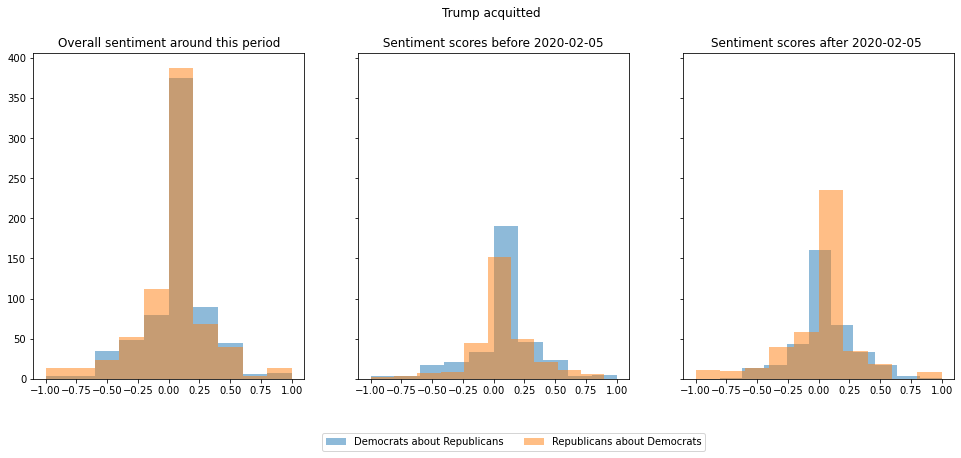

In [13]:
i = 0
for key_event in events.date:
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16.5,6))
    axes[0].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=1))) & (df_dem['date'] > (key_event - timedelta(weeks=1)))]['textblob_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[0].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=1))) & (df_rep['date'] > (key_event - timedelta(weeks=1)))]['textblob_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[0].set_title('Overall sentiment around this period')
    axes[1].hist(df_dem[(df_dem['date'] > (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['textblob_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[1].hist(df_rep[(df_rep['date'] > (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['textblob_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[1].set_title('{} \n \n Sentiment scores before {} '.format(events[events['date'] == key_event]['short_desc'][i], key_event.date()))
    axes[2].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=1))) & (df_dem['date'] >= key_event)]['textblob_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[2].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=1))) & (df_rep['date'] >= key_event)]['textblob_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[2].set_title('Sentiment scores after {} '.format(key_event.date()))
    axes[0].legend(bbox_to_anchor =(2.5, -0.15), ncol = 2)
    i = i + 1

# Summary table of TextBlob scores and number of quotes

In [14]:
# Empty tables
cols = ['Event', 'TextBlob_avg', 'TextBlob_avg_bef', 'TextBlob_avg_aft', 'Diff_TB_avg', 'Quotes_num', 'Quotes_num_bef', 'Quotes_num_aft', 'Quotes_num_evol']
sum_all = pd.DataFrame(columns=cols, index=range(len(events.date)-6))
sum_rep = pd.DataFrame(columns=cols, index=range(len(events.date)-6))
sum_dem = pd.DataFrame(columns=cols, index=range(len(events.date)-6))

In [24]:
# Fill tables
i = 0

for key_event in events.date[0:58]:
    
    sum_all['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_all['TextBlob_avg'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > (key_event - timedelta(weeks=1)))]['textblob_score'].mean()
    sum_all['TextBlob_avg_bef'][i] = df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['textblob_score'].mean()    
    sum_all['TextBlob_avg_aft'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['textblob_score'].mean()
    sum_all['Diff_TB_avg'][i] = sum_all['TextBlob_avg_aft'][i] - sum_all['TextBlob_avg_bef'][i]
    sum_all['Quotes_num'][i] = len(df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] >= (key_event - timedelta(weeks=1)))]['textblob_score'])
    sum_all['Quotes_num_bef'][i] = len(df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['textblob_score'])
    sum_all['Quotes_num_aft'][i] = len(df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['textblob_score'])
    sum_all['Quotes_num_evol'][i] = (sum_all['Quotes_num_aft'][i] - sum_all['Quotes_num_bef'][i]) / sum_all['Quotes_num_bef'][i]
    
    sum_rep['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_rep['TextBlob_avg'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > (key_event - timedelta(weeks=1)))]['textblob_score'].mean()
    sum_rep['TextBlob_avg_bef'][i] = df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['textblob_score'].mean()    
    sum_rep['TextBlob_avg_aft'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['textblob_score'].mean()
    sum_rep['Diff_TB_avg'][i] = sum_rep['TextBlob_avg_aft'][i] - sum_rep['TextBlob_avg_bef'][i]
    sum_rep['Quotes_num'][i] = len(df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] >= (key_event - timedelta(weeks=1)))]['textblob_score'])
    sum_rep['Quotes_num_bef'][i] = len(df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['textblob_score'])
    sum_rep['Quotes_num_aft'][i] = len(df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['textblob_score'])
    sum_rep['Quotes_num_evol'][i] = (sum_rep['Quotes_num_aft'][i] - sum_rep['Quotes_num_bef'][i]) / sum_rep['Quotes_num_bef'][i]
    
    sum_dem['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_dem['TextBlob_avg'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > (key_event - timedelta(weeks=1)))]['textblob_score'].mean()
    sum_dem['TextBlob_avg_bef'][i] = df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['textblob_score'].mean()    
    sum_dem['TextBlob_avg_aft'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['textblob_score'].mean()
    sum_dem['Diff_TB_avg'][i] = sum_dem['TextBlob_avg_aft'][i] - sum_dem['TextBlob_avg_bef'][i]
    sum_dem['Quotes_num'][i] = len(df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] >= (key_event - timedelta(weeks=1)))]['textblob_score'])
    sum_dem['Quotes_num_bef'][i] = len(df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['textblob_score'])
    sum_dem['Quotes_num_aft'][i] = len(df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['textblob_score'])
    sum_dem['Quotes_num_evol'][i] = (sum_dem['Quotes_num_aft'][i] - sum_dem['Quotes_num_bef'][i]) / sum_dem['Quotes_num_bef'][i]
       
    i += 1

### Tables

In [28]:
sum_all.head(2)

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
0,LGBT debate,0.087447,0.091121,0.082174,-0.008947,336,198,138,-0.30303
1,US-Cuba relations start again,0.09149,0.117159,0.07581,-0.04135,385,146,239,0.636986


In [30]:
sum_dem.head(2)

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
0,LGBT debate,0.069703,0.085838,0.048355,-0.037483,151,86,65,-0.244186
1,US-Cuba relations start again,0.084679,0.112771,0.075795,-0.036975,154,37,117,2.162162


In [31]:
sum_rep.head(2)

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
0,LGBT debate,0.101929,0.095177,0.112288,0.01711,185,112,73,-0.348214
1,US-Cuba relations start again,0.096031,0.118649,0.075823,-0.042826,231,109,122,0.119266


### Table summary

In [32]:
sum_all.iloc[:,1:9].astype(float).describe()

,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.059442,0.059074,0.060529,0.001455,850.431034,398.931034,451.500000,0.497952
std,0.027101,0.031668,0.038141,0.041121,491.307176,239.264213,281.528488,2.402388
min,-0.033435,-0.006567,-0.067828,-0.101956,19.000000,8.000000,5.000000,-0.969136
25%,0.040609,0.036960,0.041704,-0.015235,394.000000,169.750000,252.500000,-0.232143
50%,0.061876,0.057959,0.055005,-0.001646,933.000000,431.000000,459.500000,0.067229
75%,0.076378,0.075429,0.076481,0.016221,1222.250000,559.500000,669.000000,0.445014
max,0.131706,0.174122,0.215155,0.198190,1797.000000,863.000000,1011.000000,17.750000


In [33]:
sum_rep.iloc[:,1:9].astype(float).describe()

,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.056714,0.055096,0.061790,0.006695,465.982759,219.103448,246.879310,0.340269
std,0.047344,0.054441,0.052456,0.046287,294.147027,141.383352,168.010033,1.555741
min,-0.182083,-0.222667,-0.114444,-0.086898,8.000000,5.000000,3.000000,-0.953125
25%,0.028405,0.029748,0.029567,-0.026781,189.500000,104.750000,104.750000,-0.237746
50%,0.062566,0.060458,0.053780,0.007765,485.500000,224.500000,251.000000,0.098259
75%,0.084281,0.084972,0.085449,0.027831,687.500000,317.750000,379.250000,0.462208
max,0.140170,0.158359,0.208611,0.108222,1083.000000,486.000000,636.000000,11.142857


In [34]:
sum_dem.iloc[:,1:9].astype(float).describe()

,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.061593,0.064246,0.060753,-0.003493,384.448276,179.827586,204.620690,0.818727
std,0.031620,0.038407,0.047488,0.057445,211.350808,107.678231,123.637817,3.699167
min,0.013129,0.002532,-0.050347,-0.164077,11.000000,3.000000,2.000000,-0.979592
25%,0.041451,0.040941,0.036232,-0.025871,182.250000,86.750000,128.750000,-0.229520
50%,0.058707,0.061131,0.058394,-0.001488,425.500000,199.000000,205.500000,0.002448
75%,0.075272,0.074534,0.079781,0.025436,523.000000,259.500000,301.500000,0.736548
max,0.220229,0.216667,0.285851,0.240613,765.000000,428.000000,451.000000,27.000000


### Summary graphs

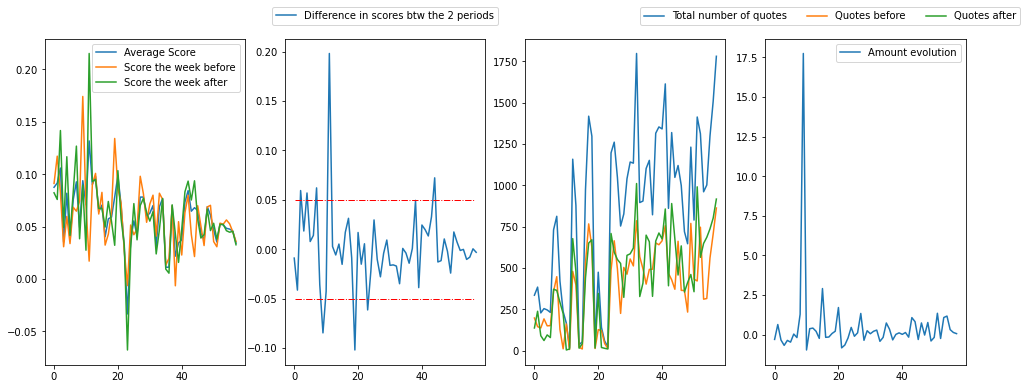

In [67]:
fig, axes = plt.subplots(1, 4, figsize=(16.5,6))
axes[0].plot(sum_all.iloc[:,1], label=('Average Score'))
axes[0].plot(sum_all.iloc[:,2], label=('Score the week before'))
axes[0].plot(sum_all.iloc[:,3], label=('Score the week after'))
axes[0].legend()
axes[1].plot(sum_all.iloc[:,4], label=('Difference in scores btw the 2 periods'))
axes[1].legend(loc='center', bbox_to_anchor=(0.5,1.07))
axes[1].axhline(y=0.05, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[1].axhline(y=-0.05, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[2].plot(sum_all.iloc[:,5], label=('Total number of quotes'))
axes[2].plot(sum_all.iloc[:,6], label=('Quotes before'))
axes[2].plot(sum_all.iloc[:,7], label=('Quotes after'))
axes[2].legend(loc='lower right', bbox_to_anchor=(0.95,0.9), bbox_transform=fig.transFigure, ncol=3)
axes[3].plot(sum_all.iloc[:,8], label=('Amount evolution'))
axes[3].legend()

#### Removing the unique very large value in 4th graph :

In [69]:
sum_all[sum_all['Quotes_num_evol'] == sum_all['Quotes_num_evol'].max()]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
9,New Hampshire primaries won by D. Trump,0.093752,0.174122,0.089466,-0.084656,237,12,225,17.75


In [73]:
sum_all2 = sum_all.drop(index=9)
sum_dem2 = sum_dem.drop(index=9)
sum_rep2 = sum_rep.drop(index=9)

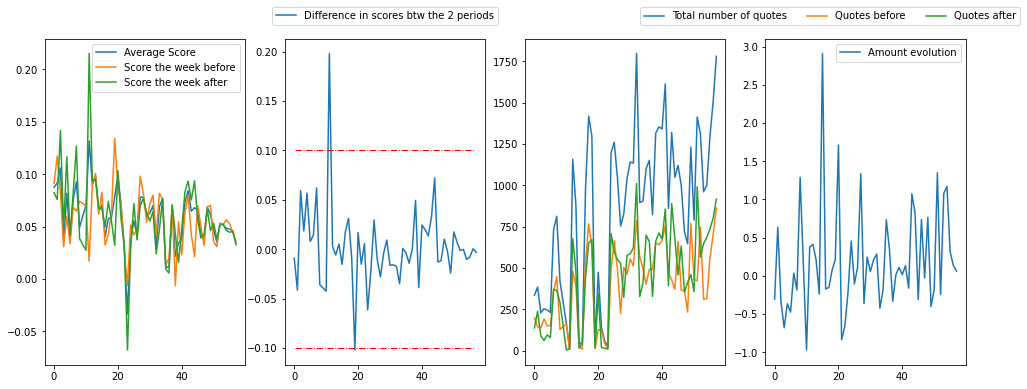

In [72]:
fig, axes = plt.subplots(1, 4, figsize=(16.5,6))
axes[0].plot(sum_all2.iloc[:,1], label=('Average Score'))
axes[0].plot(sum_all2.iloc[:,2], label=('Score the week before'))
axes[0].plot(sum_all2.iloc[:,3], label=('Score the week after'))
axes[0].legend()
axes[1].plot(sum_all2.iloc[:,4], label=('Difference in scores btw the 2 periods'))
axes[1].legend(loc='center', bbox_to_anchor=(0.5,1.07))
axes[1].axhline(y=0.1, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[1].axhline(y=-0.1, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[2].plot(sum_all2.iloc[:,5], label=('Total number of quotes'))
axes[2].plot(sum_all2.iloc[:,6], label=('Quotes before'))
axes[2].plot(sum_all2.iloc[:,7], label=('Quotes after'))
axes[2].legend(loc='lower right', bbox_to_anchor=(0.95,0.9), bbox_transform=fig.transFigure, ncol=3)
axes[3].plot(sum_all2.iloc[:,8], label=('Amount evolution'))
axes[3].legend()

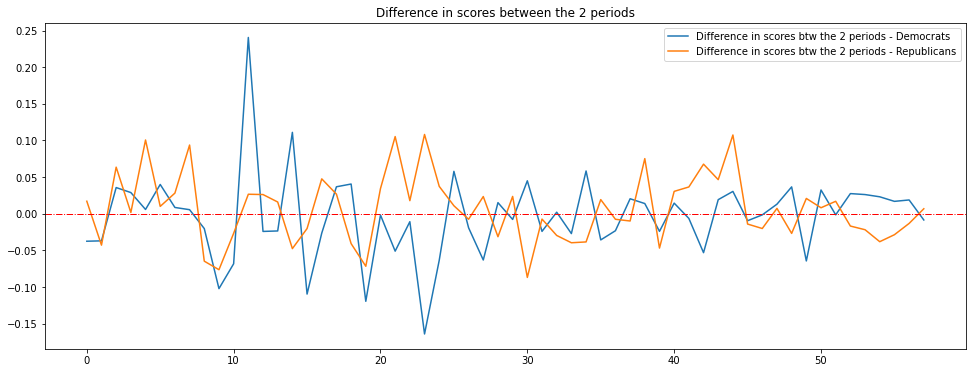

In [80]:
# Difference in scores zoomed in
fig, axes = plt.subplots(figsize=(16.5,6))
axes.plot(sum_dem.iloc[:,4], label=('Difference in scores btw the 2 periods - Democrats'))
axes.plot(sum_rep.iloc[:,4], label=('Difference in scores btw the 2 periods - Republicans'))
axes.axhline(y=0, color='r', linestyle='-.', linewidth=1)
axes.legend()
axes.set_title('Difference in scores between the 2 periods');

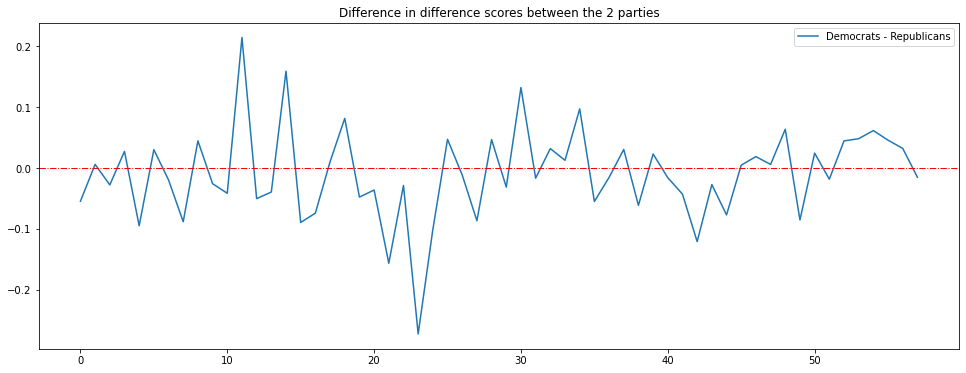

In [81]:
# Difference between each party for the difference in score
fig, axes = plt.subplots(figsize=(16.5,6))
axes.plot(sum_dem.iloc[:,4] - sum_rep.iloc[:,4], label = 'Democrats - Republicans')
axes.axhline(y=0, color='r', linestyle='-.', linewidth=1)
axes.legend()
axes.set_title('Difference in difference scores between the 2 parties');

# Most extreme values inspection
## Difference in score (average after - average before)
### Overall

In [38]:
sum_all[(sum_all.iloc[:,4] >= sum_all.iloc[:,4].quantile(0.9)) | (sum_all.iloc[:,4] <= sum_all.iloc[:,4].quantile(0.1))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
1,US-Cuba relations start again,0.09149,0.117159,0.07581,-0.04135,385,146,239,0.636986
2,2016 presidential campaign,0.105788,0.082174,0.141597,0.059422,229,138,91,-0.34058
4,H. Clinton email's controversy,0.081787,0.05965,0.116607,0.056957,247,151,96,-0.364238
7,Paul Ryan (rep.) elected Speaker of the House ...,0.092632,0.064604,0.126729,0.062125,813,448,365,-0.185268
9,New Hampshire primaries won by D. Trump,0.093752,0.174122,0.089466,-0.084656,237,12,225,17.75
10,Super Tuesday,0.070729,0.069857,0.027375,-0.042482,167,162,5,-0.969136
11,Merrick Garland Supreme Court nomination,0.131706,0.016964,0.215155,0.19819,19,8,11,0.375
19,2016 Presidential Election,0.07812,0.134031,0.032075,-0.101956,31,14,17,0.214286
23,D. Trump sworn as President,-0.033435,-0.006412,-0.067828,-0.061417,25,14,11,-0.214286
38,Murder of Jamal Kashoggi,0.021702,-0.006567,0.042898,0.049465,1315,652,663,0.016871


### Democrats

In [39]:
sum_dem[(sum_dem.iloc[:,4] >= sum_dem.iloc[:,4].quantile(0.9)) | (sum_dem.iloc[:,4] <= sum_dem.iloc[:,4].quantile(0.1))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
9,New Hampshire primaries won by D. Trump,0.097526,0.19619,0.094002,-0.102188,145,5,140,27.0
10,Super Tuesday,0.066949,0.068244,0.0,-0.068244,100,98,2,-0.979592
11,Merrick Garland Supreme Court nomination,0.220229,0.045238,0.285851,0.240613,11,3,8,1.666667
14,Orlando shooting,0.076088,0.051399,0.1625,0.111101,18,14,4,-0.714286
15,Democrat Representatives protest in House of R...,0.118795,0.216667,0.10705,-0.109617,28,3,25,7.333333
18,Presidential debate betwenn D. Trump and H. Cl...,0.086133,0.067283,0.107861,0.040578,562,294,268,-0.088435
19,2016 Presidential Election,0.06857,0.13775,0.018258,-0.119492,19,8,11,0.375
23,D. Trump sworn as President,0.036517,0.11373,-0.050347,-0.164077,17,9,8,-0.111111
25,Charleston church shooting,0.03171,0.002532,0.060406,0.057874,626,300,326,0.086667
30,US recognire Jerusalem as Israel's capital,0.055555,0.032507,0.077502,0.044995,605,303,302,-0.0033


### Republicans

In [40]:
sum_rep[(sum_rep.iloc[:,4] >= sum_rep.iloc[:,4].quantile(0.9)) | (sum_rep.iloc[:,4] <= sum_rep.iloc[:,4].quantile(0.1))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
4,H. Clinton email's controversy,0.085815,0.051794,0.152467,0.100673,145,96,49,-0.489583
7,Paul Ryan (rep.) elected Speaker of the House ...,0.115396,0.067216,0.161004,0.093788,451,220,231,0.05
8,San Bernardino shooting,0.096927,0.141721,0.077019,-0.064702,143,44,99,1.25
9,New Hampshire primaries won by D. Trump,0.087804,0.158359,0.081994,-0.076365,92,7,85,11.142857
14,Orlando shooting,0.052947,0.082998,0.035417,-0.047582,19,7,12,0.714286
19,2016 Presidential Election,0.09324,0.129072,0.057407,-0.071665,12,6,6,0.0
21,US troosp withdraw from Afghanistan,0.11299,0.103266,0.208611,0.105345,65,59,6,-0.898305
23,D. Trump sworn as President,-0.182083,-0.222667,-0.114444,0.108222,8,5,3,-0.4
30,US recognire Jerusalem as Israel's capital,0.070971,0.118312,0.031414,-0.086898,536,252,284,0.126984
38,Murder of Jamal Kashoggi,0.007838,-0.036368,0.038887,0.075256,846,390,456,0.169231


## Number of quotes
### Overall

In [42]:
sum_all[(sum_all.iloc[:,8] >= sum_all.iloc[:,8].quantile(0.9)) | (sum_all.iloc[:,8] <= sum_all.iloc[:,8].quantile(0.1))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.035204,0.030714,0.049181,0.018467,255,193,62,-0.678756
5,Same-sex marriage supreme court rule,0.036392,0.033693,0.041521,0.007827,232,152,80,-0.473684
8,San Bernardino shooting,0.049215,0.074164,0.038315,-0.035849,421,128,293,1.289062
9,New Hampshire primaries won by D. Trump,0.093752,0.174122,0.089466,-0.084656,237,12,225,17.75
10,Super Tuesday,0.070729,0.069857,0.027375,-0.042482,167,162,5,-0.969136
15,Democrat Representatives protest in House of R...,0.070413,0.082576,0.067301,-0.015275,54,11,43,2.909091
20,D. Trump visits Taiwan,0.098725,0.086334,0.103296,0.016962,475,128,347,1.710938
21,US troosp withdraw from Afghanistan,0.070219,0.072348,0.057233,-0.015115,142,122,20,-0.836066
22,Allegations of russian interference in preside...,0.03004,0.026727,0.032286,0.005559,59,44,15,-0.659091
27,New immigration policy bill by Trump administr...,0.078052,0.097941,0.070039,-0.027902,754,226,528,1.336283


### Democrats

In [43]:
sum_dem[(sum_dem.iloc[:,8] >= sum_dem.iloc[:,8].quantile(0.9)) | (sum_dem.iloc[:,8] <= sum_dem.iloc[:,8].quantile(0.1))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
1,US-Cuba relations start again,0.084679,0.112771,0.075795,-0.036975,154,37,117,2.162162
3,Baltimore protests,0.043239,0.034906,0.06384,0.028935,125,89,36,-0.595506
5,Same-sex marriage supreme court rule,0.070259,0.060179,0.100165,0.039986,119,89,30,-0.662921
9,New Hampshire primaries won by D. Trump,0.097526,0.19619,0.094002,-0.102188,145,5,140,27.0
10,Super Tuesday,0.066949,0.068244,0.0,-0.068244,100,98,2,-0.979592
11,Merrick Garland Supreme Court nomination,0.220229,0.045238,0.285851,0.240613,11,3,8,1.666667
14,Orlando shooting,0.076088,0.051399,0.1625,0.111101,18,14,4,-0.714286
15,Democrat Representatives protest in House of R...,0.118795,0.216667,0.10705,-0.109617,28,3,25,7.333333
20,D. Trump visits Taiwan,0.116771,0.11811,0.116324,-0.001785,272,68,204,2.0
21,US troosp withdraw from Afghanistan,0.034113,0.043392,-0.007643,-0.051036,77,63,14,-0.777778


### Republicans

In [44]:
sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9)) | (sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.027479,0.027128,0.028884,0.001756,130,104,26,-0.75
4,H. Clinton email's controversy,0.085815,0.051794,0.152467,0.100673,145,96,49,-0.489583
8,San Bernardino shooting,0.096927,0.141721,0.077019,-0.064702,143,44,99,1.25
9,New Hampshire primaries won by D. Trump,0.087804,0.158359,0.081994,-0.076365,92,7,85,11.142857
10,Super Tuesday,0.075998,0.072328,0.045625,-0.026703,67,64,3,-0.953125
15,Democrat Representatives protest in House of R...,0.018309,0.032292,0.012095,-0.020197,26,8,18,1.25
20,D. Trump visits Taiwan,0.074546,0.050322,0.08471,0.034388,203,60,143,1.383333
21,US troosp withdraw from Afghanistan,0.11299,0.103266,0.208611,0.105345,65,59,6,-0.898305
22,Allegations of russian interference in preside...,0.052959,0.045214,0.063095,0.017881,23,16,7,-0.5625
27,New immigration policy bill by Trump administr...,0.126135,0.109897,0.133394,0.023497,329,107,222,1.074766


In [45]:
print('Overall : \n',sum_all[(sum_all.iloc[:,8] >= sum_all.iloc[:,8].quantile(0.9)) | (sum_all.iloc[:,8] <= sum_all.iloc[:,8].quantile(0.1))]['Event'],
     '\n \n Democrats : \n', sum_dem[(sum_dem.iloc[:,8] >= sum_dem.iloc[:,8].quantile(0.9)) | (sum_dem.iloc[:,8] <= sum_dem.iloc[:,8].quantile(0.1))]['Event'],
     '\n \n Republicans : \n', sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9)) | (sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))]['Event'])


Overall : 
 3                                    Baltimore protests
5                  Same-sex marriage supreme court rule
8                               San Bernardino shooting
9               New Hampshire primaries won by D. Trump
10                                        Super Tuesday
15    Democrat Representatives protest in House of R...
20                               D. Trump visits Taiwan
21                  US troosp withdraw from Afghanistan
22    Allegations of russian interference in preside...
27    New immigration policy bill by Trump administr...
33        Marjory Stoneman Douglas High School shooting
51    Start of impeachment inquiry against Pres. D. ...
Name: Event, dtype: object 
 
 Democrats : 
 1                         US-Cuba relations start again
3                                    Baltimore protests
5                  Same-sex marriage supreme court rule
9               New Hampshire primaries won by D. Trump
10                                        Super

## Most controversial events (Increase in number of quotes the week after)
### Overall

In [46]:
sum_all[(sum_all.iloc[:,8] >= sum_all.iloc[:,8].quantile(0.9))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
8,San Bernardino shooting,0.049215,0.074164,0.038315,-0.035849,421,128,293,1.289062
9,New Hampshire primaries won by D. Trump,0.093752,0.174122,0.089466,-0.084656,237,12,225,17.75
15,Democrat Representatives protest in House of R...,0.070413,0.082576,0.067301,-0.015275,54,11,43,2.909091
20,D. Trump visits Taiwan,0.098725,0.086334,0.103296,0.016962,475,128,347,1.710938
27,New immigration policy bill by Trump administr...,0.078052,0.097941,0.070039,-0.027902,754,226,528,1.336283
51,Start of impeachment inquiry against Pres. D. ...,0.035225,0.030676,0.037935,0.007259,1413,422,991,1.348341


### Democrats

In [47]:
sum_dem[(sum_dem.iloc[:,8] >= sum_dem.iloc[:,8].quantile(0.9))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
1,US-Cuba relations start again,0.084679,0.112771,0.075795,-0.036975,154,37,117,2.162162
9,New Hampshire primaries won by D. Trump,0.097526,0.19619,0.094002,-0.102188,145,5,140,27.0
11,Merrick Garland Supreme Court nomination,0.220229,0.045238,0.285851,0.240613,11,3,8,1.666667
15,Democrat Representatives protest in House of R...,0.118795,0.216667,0.10705,-0.109617,28,3,25,7.333333
20,D. Trump visits Taiwan,0.116771,0.11811,0.116324,-0.001785,272,68,204,2.0
44,2020 presidential campaign starts,0.055499,0.032384,0.062879,0.030495,447,110,337,2.063636


### Republicans

In [48]:
sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
8,San Bernardino shooting,0.096927,0.141721,0.077019,-0.064702,143,44,99,1.25
9,New Hampshire primaries won by D. Trump,0.087804,0.158359,0.081994,-0.076365,92,7,85,11.142857
15,Democrat Representatives protest in House of R...,0.018309,0.032292,0.012095,-0.020197,26,8,18,1.25
20,D. Trump visits Taiwan,0.074546,0.050322,0.08471,0.034388,203,60,143,1.383333
27,New immigration policy bill by Trump administr...,0.126135,0.109897,0.133394,0.023497,329,107,222,1.074766
51,Start of impeachment inquiry against Pres. D. ...,0.031613,0.018872,0.03589,0.017018,852,216,636,1.944444


## Silencing events (less quotes the week after)
### Overall

In [82]:
sum_all[(sum_all.iloc[:,8] <= sum_all.iloc[:,8].quantile(0.1))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.035204,0.030714,0.049181,0.018467,255,193,62,-0.678756
5,Same-sex marriage supreme court rule,0.036392,0.033693,0.041521,0.007827,232,152,80,-0.473684
10,Super Tuesday,0.070729,0.069857,0.027375,-0.042482,167,162,5,-0.969136
21,US troosp withdraw from Afghanistan,0.070219,0.072348,0.057233,-0.015115,142,122,20,-0.836066
22,Allegations of russian interference in preside...,0.03004,0.026727,0.032286,0.005559,59,44,15,-0.659091
33,Marjory Stoneman Douglas High School shooting,0.068839,0.081804,0.046907,-0.034897,896,568,328,-0.422535


### Democrats

In [50]:
sum_dem[(sum_dem.iloc[:,8] <= sum_dem.iloc[:,8].quantile(0.1))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.043239,0.034906,0.06384,0.028935,125,89,36,-0.595506
5,Same-sex marriage supreme court rule,0.070259,0.060179,0.100165,0.039986,119,89,30,-0.662921
10,Super Tuesday,0.066949,0.068244,0.0,-0.068244,100,98,2,-0.979592
14,Orlando shooting,0.076088,0.051399,0.1625,0.111101,18,14,4,-0.714286
21,US troosp withdraw from Afghanistan,0.034113,0.043392,-0.007643,-0.051036,77,63,14,-0.777778
22,Allegations of russian interference in preside...,0.014284,0.016163,0.005327,-0.010836,36,28,8,-0.714286


### Republicans 

In [51]:
sum_rep[(sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))]

,Event,TextBlob_avg,TextBlob_avg_bef,TextBlob_avg_aft,Diff_TB_avg,Quotes_num,Quotes_num_bef,Quotes_num_aft,Quotes_num_evol
3,Baltimore protests,0.027479,0.027128,0.028884,0.001756,130,104,26,-0.75
4,H. Clinton email's controversy,0.085815,0.051794,0.152467,0.100673,145,96,49,-0.489583
10,Super Tuesday,0.075998,0.072328,0.045625,-0.026703,67,64,3,-0.953125
21,US troosp withdraw from Afghanistan,0.11299,0.103266,0.208611,0.105345,65,59,6,-0.898305
22,Allegations of russian interference in preside...,0.052959,0.045214,0.063095,0.017881,23,16,7,-0.5625
28,Las Vegas mass shooting,0.07178,0.084724,0.053381,-0.031342,395,268,127,-0.526119
